<a href="https://colab.research.google.com/github/YuriyNaumov/real_estate_evaluation/blob/main/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%BD%D0%B5%D0%B4%D0%BE%D0%BE%D1%86%D0%B5%D0%BD%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

from math import radians, cos, sin, asin, sqrt
import geopandas as gpd
from geopandas.tools import sjoin

import IPython

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.geometry import mapping

import geopy.distance

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import folium.plugins as plugins
from folium.features import DivIcon


pd.options.display.max_columns = 50
pd.set_option('use_inf_as_na',True)

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# проданные
# select

# tbl_flats.CartNumber as 'Номер варианта',

# convert(Date, tbl_flats.LastEditDate, 114) as 'date',

# tbl_flats.FolderID as 'Папка',

# tbl_feature.Name as 'Признак',

# tbl_objectstype.Name as 'Тип объекта',

# tbl_objectstype2.Name as 'Родительский_тип',

# tbl_flats.RoomsNumber as 'Количество комнат',

# tbl_Settlment.Name as 'Settlement',

# tbl_district.Name as 'District',

# tbl_street.Name as 'Street',

# tbl_objects.House as 'obj_number',
# tbl_objects.House_Dop as 'obj_dop',

# tbl_flats.TotalSpace as 'Space',

# tbl_flats.Height_Roof as 'Высота_потолка',

# tbl_flats.Balcon_Num as 'Balkon Number',

# tbl_flats.Ipoteka as 'Ipoteka',

# tbl_flats.Metro_m as 'Metro distance',

# tbl_flats.Stor as 'Этаж',

# tbl_flats.Storeys as 'Этажность',

# tbl_objects.Date_Postr as 'Год постройки',

# tbl_sost.Name as 'Sost',

# tbl_flats.Sotka as 'Участок',

# tbl_flats.Clozet_Num_C as 'Clozet',

# tbl_walls.Name as 'Wall',

# f.GPS_Lat as 'Lat',

# f.GPS_Long as 'Long',

# tbl_flats.Value as 'Цена'

# from sql.[RFLATS_FLATS].[dbo].[tblFlats] as tbl_flats

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_CRM] as tbl_objects on tbl_flats.Object_ID = tbl_objects.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype on tbl_objects.Object_Type_Object_ID = tbl_objectstype.ID

# Left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype2 on tbl_objectstype.Parent_ID = tbl_objectstype2.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Feature] as tbl_feature on tbl_flats.Feature = tbl_feature.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Settlement] as tbl_Settlment on tbl_flats.SettlementID = tbl_Settlment.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_District] as tbl_district on tbl_flats.DistrictID = tbl_district.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Street] as tbl_street on tbl_flats.StreetID = tbl_street.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Sost] as tbl_sost on tbl_flats.SostID = tbl_sost.ID

# left join sql.base.[dbo].[tblObjects_Wall] as tbl_walls on tbl_walls.ID = tbl_flats.WallID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_CRM_Table] as f on f.FLat_ID = tbl_flats.ID

# where tbl_flats.FolderID = 2 and tbl_flats.Feature in (8) and tbl_flats.LastEditDate between '01.01.2019' and '30.11.2023 23:59:59'
# Order by tbl_flats.LastEditDate

In [2]:
# проданные 11.02.2024

# select distinct

# tbl_flats.Cart_Number as 'Номер варианта',

# CONVERT(varchar,LF.Date_Create,104) AS [date],

# tbl_flats.Folder_ID as 'Папка',

# tbl_feature.Name as 'Признак',

# tbl_objectstype.Name as 'Тип объекта',

# tbl_objectstype2.Name as 'Родительский_тип',

# tbl_flats.Rooms_Number as 'Количество комнат',

# tbl_Settlment.Name as 'Settlement',

# tbl_district.Name as 'District',

# tbl_street.Name as 'Street',

# tbl_objects.House as 'obj_number',
# tbl_objects.House_Dop as 'obj_dop',

# tbl_flats.Space_Total as 'Space',

# tbl_flats.Height_Roof as 'Высота_потолка',

# tbl_flats.Balcon_Num as 'Balkon Number',

# tbl_flats.Ipoteka as 'Ipoteka',

# tbl_flats.Metro_m as 'Metro distance',

# tbl_flats.Stor as 'Этаж',

# tbl_flats.Storeys as 'Этажность',

# tbl_objects.Date_Postr as 'Год постройки',

# tbl_sost.Name as 'Sost',

# tbl_flats.Space_Sotka as 'Участок',

# tbl_clozet.Name as 'Clozet',

# tbl_walls.Name as 'Wall',

# tbl_objects.GPS_Lat as 'Lat',

# tbl_objects.GPS_Long as 'Long',

# tbl_flats.Cost as 'Цена(сейчас)',

# ROW_NUMBER() OVER(PARTITION BY tbl_flats.Cart_Number ORDER BY LC.Date_Create DESC) as [rank_sign],

# CONVERT(varchar,LC.Date_Create,104) AS [Дата изменения цены],

# LC.Cost AS [Цена],

# CONVERT(varchar,LF.Date_Create,104) AS [Дата изменения признака],

# LF.Commentary AS [Признак]

# from sql.[RFLATS_FLATS].[dbo].vw_Flats_CRM_Save as tbl_flats

# inner join sql.[RFLATS_FLATS].[dbo].vw_Log_Feature as LFEA on LFEA.Flat_ID = tbl_flats.Flat_ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_CRM] as tbl_objects on tbl_flats.Object_ID = tbl_objects.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype on tbl_objects.Object_Type_Object_ID = tbl_objectstype.ID

# Left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype2 on tbl_objectstype.Parent_ID = tbl_objectstype2.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Feature] as tbl_feature on tbl_flats.Feature_ID = tbl_feature.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Settlement] as tbl_Settlment on tbl_flats.Settlement_ID = tbl_Settlment.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_District] as tbl_district on tbl_flats.District_ID = tbl_district.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Street] as tbl_street on tbl_flats.Street_ID = tbl_street.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Sost] as tbl_sost on tbl_flats.Sost_ID = tbl_sost.ID

# left join sql.base.[dbo].[tblObjects_Wall] as tbl_walls on tbl_walls.ID = tbl_flats.Wall_ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Clozet] as tbl_clozet on tbl_clozet.ID = tbl_flats.Clozet_ID

# CROSS APPLY (select * FROM sql.[RFLATS_FLATS].dbo.vw_Log_Cost LCC where LCC.Flat_ID = tbl_flats.Flat_ID ) AS LC

# CROSS APPLY (select * FROM sql.[RFLATS_FLATS].dbo.vw_Log_Feature LCF where LCF.Flat_ID = tbl_flats.Flat_ID ) AS LF

# where

# LFEA.Feature_ID = 8 AND (LFEA.Date_Create >= CAST('2024-01-01' AS DATE))AND(LFEA.Date_Create <= CAST('2024-01-30' AS DATE))

# AND (tbl_flats.Feature_ID = 8) and (LF.Commentary = 'Продана Жилфондом')



In [ ]:
# В продаже
# select

# tbl_flats.CartNumber as 'Номер варианта',

# convert(Date, tbl_flats.LastEditDate, 114) as 'date',

# tbl_flats.FolderID as 'Папка',

# tbl_feature.Name as 'Признак',

# tbl_objectstype.Name as 'Тип объекта',

# tbl_objectstype2.Name as 'Родительский_тип',

# tbl_flats.RoomsNumber as 'Количество комнат',

# tbl_Settlment.Name as 'Settlement',

# tbl_district.Name as 'District',

# tbl_street.Name as 'Street',

# tbl_objects.House as 'obj_number',
# tbl_objects.House_Dop as 'obj_dop',

# tbl_flats.TotalSpace as 'Space',

# tbl_flats.Height_Roof as 'Высота_потолка',

# tbl_flats.Balcon_Num as 'Balkon Number',

# tbl_flats.Ipoteka as 'Ipoteka',

# tbl_flats.Metro_m as 'Metro distance',

# tbl_flats.Stor as 'Этаж',

# tbl_flats.Storeys as 'Этажность',

# tbl_objects.Date_Postr as 'Год постройки',

# tbl_sost.Name as 'Sost',

# tbl_flats.Sotka as 'Участок',

# tbl_flats.Clozet_Num_C as 'Clozet',

# tbl_walls.Name as 'Wall',

# f.GPS_Lat as 'Lat',

# f.GPS_Long as 'Long',

# tbl_flats.Value as 'Цена'

# from sql.[RFLATS_FLATS].[dbo].[tblFlats] as tbl_flats

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_CRM] as tbl_objects on tbl_flats.Object_ID = tbl_objects.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype on tbl_objects.Object_Type_Object_ID = tbl_objectstype.ID

# Left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype2 on tbl_objectstype.Parent_ID = tbl_objectstype2.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Feature] as tbl_feature on tbl_flats.Feature = tbl_feature.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Settlement] as tbl_Settlment on tbl_flats.SettlementID = tbl_Settlment.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_District] as tbl_district on tbl_flats.DistrictID = tbl_district.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Street] as tbl_street on tbl_flats.StreetID = tbl_street.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Sost] as tbl_sost on tbl_flats.SostID = tbl_sost.ID

# left join sql.base.[dbo].[tblObjects_Wall] as tbl_walls on tbl_walls.ID = tbl_flats.WallID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_CRM_Table] as f on f.FLat_ID = tbl_flats.ID

# where tbl_flats.FolderID = 1 and tbl_flats.Feature in (1,2,3,5,11)
# Order by tbl_flats.LastEditDate

In [321]:
## В продаааже 11.02.2024

# select distinct

# tbl_flats.Cart_Number as 'Номер варианта',

# tbl_flats.Folder_ID as 'Папка',

# tbl_feature.Name as 'Признак',

# tbl_objectstype.Name as 'Тип объекта',

# tbl_objectstype2.Name as 'Родительский_тип',

# tbl_flats.Rooms_Number as 'Количество комнат',

# tbl_Settlment.Name as 'Settlement',

# tbl_district.Name as 'District',

# tbl_street.Name as 'Street',

# tbl_objects.House as 'obj_number',
# tbl_objects.House_Dop as 'obj_dop',

# tbl_flats.Space_Total as 'Space',

# tbl_flats.Height_Roof as 'Высота_потолка',

# tbl_flats.Balcon_Num as 'Balkon Number',

# tbl_flats.Ipoteka as 'Ipoteka',

# tbl_flats.Metro_m as 'Metro distance',

# tbl_flats.Stor as 'Этаж',

# tbl_flats.Storeys as 'Этажность',

# tbl_objects.Date_Postr as 'Год постройки',

# tbl_sost.Name as 'Sost',

# tbl_flats.Space_Sotka as 'Участок',

# tbl_clozet.Name as 'Clozet',

# tbl_walls.Name as 'Wall',

# tbl_objects.GPS_Lat as 'Lat',

# tbl_objects.GPS_Long as 'Long',

# tbl_flats.Cost as 'Цена(сейчас)',

# MAX(LC.Cost) OVER(PARTITION BY tbl_flats.Cart_Number) as [last_price_on_period],

# ROW_NUMBER() OVER(PARTITION BY tbl_flats.Cart_Number ORDER BY LC.Date_Create DESC) as [rank_sign],

# LC.Cost AS [Цена],

# CONVERT(varchar,LC.Date_Create,104) AS [date]

# from sql.[RFLATS_FLATS].[dbo].vw_Flats_CRM_Save as tbl_flats

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_CRM] as tbl_objects on tbl_flats.Object_ID = tbl_objects.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype on tbl_objects.Object_Type_Object_ID = tbl_objectstype.ID

# Left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype2 on tbl_objectstype.Parent_ID = tbl_objectstype2.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Feature] as tbl_feature on tbl_flats.Feature_ID = tbl_feature.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Settlement] as tbl_Settlment on tbl_flats.Settlement_ID = tbl_Settlment.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_District] as tbl_district on tbl_flats.District_ID = tbl_district.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Address_Street] as tbl_street on tbl_flats.Street_ID = tbl_street.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Sost] as tbl_sost on tbl_flats.Sost_ID = tbl_sost.ID

# left join sql.base.[dbo].[tblObjects_Wall] as tbl_walls on tbl_walls.ID = tbl_flats.Wall_ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Clozet] as tbl_clozet on tbl_clozet.ID = tbl_flats.Clozet_ID

# CROSS APPLY (select * FROM sql.[RFLATS_FLATS].dbo.vw_Log_Cost LCC where LCC.Flat_ID = tbl_flats.Flat_ID AND LCC.Date_Create between '2023-01-01' and '2024-02-01') AS LC

# where tbl_flats.Feature_ID in (2,5,8)

## Первичная предобработка

In [ ]:
## Сделать запросы идентичными

In [3]:
# df_sold_test = pd.read_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/Sales_jan_oct2023.xlsx')
# df_sold_test.head()


In [322]:
# df_sold = pd.read_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/Sold_2019_2023.xlsx')
df_sold = pd.read_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/Sales_jan2024.xlsx', sheet_name='Продано')
df_sold.head()

,Номер варианта,date,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),rank_sign,Дата изменения цены,Цена,Дата изменения признака,Признак.1
0,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,NaN,143.9,2.7,0,1,0,6,12,1998,Отличное,0.0,Несколько (2 и более),Кирпич,55.0395,82.8948,14700,1,2024-01-29,14700.0,2024-01-29,Продана ЖИЛФОНДОМ
1,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,NaN,143.9,2.7,0,1,0,6,12,1998,Отличное,0.0,Несколько (2 и более),Кирпич,55.0395,82.8948,14700,2,2023-11-21,15200.0,2024-01-29,Продана ЖИЛФОНДОМ
2,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,NaN,143.9,2.7,0,1,0,6,12,1998,Отличное,0.0,Несколько (2 и более),Кирпич,55.0395,82.8948,14700,3,2023-11-21,15200.0,2024-01-29,Продана ЖИЛФОНДОМ
3,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,NaN,143.9,2.7,0,1,0,6,12,1998,Отличное,0.0,Несколько (2 и более),Кирпич,55.0395,82.8948,14700,4,2023-09-20,14990.0,2024-01-29,Продана ЖИЛФОНДОМ
4,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,NaN,143.9,2.7,0,1,0,6,12,1998,Отличное,0.0,Несколько (2 и более),Кирпич,55.0395,82.8948,14700,5,2023-06-14,15400.0,2024-01-29,Продана ЖИЛФОНДОМ


In [323]:
df_sold = df_sold.loc[(df_sold['rank_sign']==1)].reset_index(drop=True)
df_sold.head()

,Номер варианта,date,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),rank_sign,Дата изменения цены,Цена,Дата изменения признака,Признак.1
0,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,NaN,143.9,2.7,0,1,0,6,12,1998,Отличное,0.00,Несколько (2 и более),Кирпич,55.039500,82.894800,14700,1,2024-01-29,14700.0,2024-01-29,Продана ЖИЛФОНДОМ
1,80030149,2024-01-18,2,Продана ЖИЛФОНДОМ,Коттедж,Земля,8,Новосибирск,Заельцовский,Мартовская,1,NaN,686.5,3.3,0,1,0,3,3,2011,Евро-ремонт,8.99,Несколько (2 и более),Кирпич,55.068850,82.876502,71000,1,2024-01-18,71000.0,2024-01-18,Продана ЖИЛФОНДОМ
2,80034964,2024-01-26,2,Продана ЖИЛФОНДОМ,Дом,Земля,8,Новосибирск,Заельцовский,Красногорская,3,NaN,248.0,2.9,1,1,0,3,3,2007,Отличное,5.04,В доме,Брус,55.073100,82.895600,12600,1,2024-01-31,12600.0,2024-01-26,Продана ЖИЛФОНДОМ
3,80480214,2024-01-27,2,Продана ЖИЛФОНДОМ,Земельный участок,Земля,8,Красный Яр,Ордынский,Сергеева,19,NaN,0.0,0.0,0,1,0,0,0,0,NaN,15.00,NaN,NaN,54.446400,82.141800,550,1,2023-10-04,550.0,2024-01-27,Продана ЖИЛФОНДОМ
4,80482726,2024-01-19,2,Продана ЖИЛФОНДОМ,Дом,Земля,8,Усть-Алеус,Ордынский,Кириллова,143,NaN,52.0,2.6,0,0,0,2,2,0,Отличное,23.00,На улице,Кирпич,54.099207,81.447767,3600,1,2023-04-18,3600.0,2024-01-19,Продана ЖИЛФОНДОМ


In [328]:
df_in_sales = pd.read_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/Sales_jan2024.xlsx', sheet_name='В_продаже')
df_in_sales.head()

,Номер варианта,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),last_price_on_period,rank_sign,Цена,date,Признак.1,Дата изменения признака
0,805674,1,Эксклюзив ЧП,Дом,Земля,8,Маслянино,Маслянинский,Дорожная,27,NaN,182.3,0.0,0,1,0,2,2,1997,Отличное,22.0,Несколько (2 и более),Кирпич,54.3572,84.2238,8500.0,8500.0,1,8500.0,2023-09-04,Эксклюзив ЧП,2023-04-11
1,805674,1,Эксклюзив ЧП,Дом,Земля,8,Маслянино,Маслянинский,Дорожная,27,NaN,182.3,0.0,0,1,0,2,2,1997,Отличное,22.0,Несколько (2 и более),Кирпич,54.3572,84.2238,8500.0,8500.0,2,8500.0,2023-09-04,Эксклюзив ЧП,2023-10-18
2,805674,1,Эксклюзив ЧП,Дом,Земля,8,Маслянино,Маслянинский,Дорожная,27,NaN,182.3,0.0,0,1,0,2,2,1997,Отличное,22.0,Несколько (2 и более),Кирпич,54.3572,84.2238,8500.0,8500.0,3,8500.0,2023-09-04,Чистая продажа,2023-04-10
3,805674,1,Эксклюзив ЧП,Дом,Земля,8,Маслянино,Маслянинский,Дорожная,27,NaN,182.3,0.0,0,1,0,2,2,1997,Отличное,22.0,Несколько (2 и более),Кирпич,54.3572,84.2238,8500.0,8500.0,4,8500.0,2023-09-04,Чистая продажа,2023-04-10
4,805674,1,Эксклюзив ЧП,Дом,Земля,8,Маслянино,Маслянинский,Дорожная,27,NaN,182.3,0.0,0,1,0,2,2,1997,Отличное,22.0,Несколько (2 и более),Кирпич,54.3572,84.2238,8500.0,8500.0,5,8500.0,2023-09-04,Чистая продажа,2023-10-11


In [330]:
df_in_sales.shape

(175069, 32)

In [331]:
df_in_sales['Признак.1'].value_counts()

Эксклюзив ЧП                       55715
Продана ЖИЛФОНДОМ                  34475
Задаток                            33530
Чистая продажа                     26117
Эксклюзив Обм                      10779
Обмен                               4419
ПРОЗВОНИТЬ                          3459
Сняли с продажи                     2273
Отложена                            1183
Чужая                                813
РАССЫЛКА                             672
Консультация                         412
Другое ЧП                            404
Задаток чужой                        316
Без ОТВЕТА                           139
Другое Обм                           135
Не продает/Подменнный номер           99
Продана не нами                       75
Повтор                                50
Засады                                 2
Партнеры                               1
Официальный партнёр застройщика        1
Name: Признак.1, dtype: int64

In [332]:
df_in_sales = df_in_sales.loc[~df_in_sales['Признак.1'].isin(['Продана ЖИЛФОНДОМ', 'Сняли с продажи'])]
df_in_sales = df_in_sales.loc[(df_in_sales['rank_sign']==1)].reset_index(drop=True)
df_in_sales

,Номер варианта,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),last_price_on_period,rank_sign,Цена,date,Признак.1,Дата изменения признака
0,805674,1,Эксклюзив ЧП,Дом,Земля,8,Маслянино,Маслянинский,Дорожная,27,NaN,182.3,0.00,0,1,0,2,2,1997,Отличное,22.0,Несколько (2 и более),Кирпич,54.3572,84.2238,8500.0,8500.0,1,8500.0,2023-09-04,Эксклюзив ЧП,2023-04-11
1,4002724,2,Продана ЖИЛФОНДОМ,Элитная,Квартиры/Комнаты,4,Новосибирск,Железнодорожный,Красноярская,40,NaN,167.4,3.10,2,0,0,3,9,1997,Евро-ремонт,0.0,Несколько (2 и более),Кирпич,55.0412,82.9010,17150.0,18500.0,1,17150.0,2023-12-19,Эксклюзив ЧП,2023-01-21
2,4004269,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,4,Новосибирск,Калининский,Фадеева,91,NaN,78.7,0.00,1,1,0,6,10,1993,Удовлетворительное,0.0,Раздельный,Панель,55.1009,82.9343,6900.0,6900.0,1,6900.0,2023-05-17,Эксклюзив ЧП,2023-05-17
3,4009457,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,4,Новосибирск,Советский,Вахтангова,39,NaN,84.7,2.70,1,1,0,3,10,2002,Хорошее,0.0,Раздельный,Панель,54.8526,83.0519,7100.0,7300.0,1,7300.0,2023-08-28,Эксклюзив ЧП,2023-08-28
4,5010144,1,Эксклюзив ЧП,Полногабаритная,Квартиры/Комнаты,5,Новосибирск,Центральный,Красный проспект,30,NaN,132.5,3.00,0,1,0,5,7,1953,Отличное,0.0,Раздельный,Кирпич,55.0262,82.9223,17500.0,22260.0,1,16000.0,2023-12-05,Чистая продажа,2023-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504,9054109445,2,Продана ЖИЛФОНДОМ,Общежитие,Квартиры/Комнаты,9,Новосибирск,Железнодорожный,Советская,97,NaN,17.6,2.50,0,1,0,5,5,1963,Отличное,0.0,Раздельный,Кирпич,55.0461,82.9118,1815.0,1850.0,1,1850.0,2023-12-15,Эксклюзив ЧП,2023-12-15
11505,9054109447,2,Продана ЖИЛФОНДОМ,Типовая,Квартиры/Комнаты,3,Новосибирск,Октябрьский,Ленинградская,184,NaN,60.1,2.50,1,1,0,7,9,1971,Хорошее,0.0,Раздельный,Панель,55.0096,82.9659,5000.0,2500.0,1,2500.0,2023-12-15,Эксклюзив ЧП,2023-12-15
11506,9054109460,1,Эксклюзив ЧП,Полногабаритная,Квартиры/Комнаты,9,Новосибирск,Дзержинский,Авиастроителей,13,а,77.3,3.20,0,1,0,2,3,1952,Отличное,0.0,Раздельный,Классическая кладка,55.0734,82.9725,1700.0,1700.0,1,1650.0,2023-12-26,Эксклюзив ЧП,2023-12-18
11507,9054109464,1,Эксклюзив ЧП,Типовая,Квартиры/Комнаты,9,Новосибирск,Калининский,Кропоткина,130,/1,74.3,2.50,0,1,0,5,9,1986,Хорошее,0.0,Раздельный,Панель,55.0552,82.9402,2800.0,3000.0,1,2900.0,2023-12-27,Эксклюзив ЧП,2023-12-18


In [333]:
len(df_in_sales['Номер варианта'].unique())

11509

In [9]:
# df_in_sales = df_in_sales.rename(columns={'Дата изменения цены':'date'})
# df_in_sales.head()

In [316]:
df_indexes = pd.read_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/Sold_indexes_flats_nsk.xlsx')
df_indexes['Year'] = df_indexes['Месяц'].dt.year
df_indexes['Month'] = df_indexes['Месяц'].dt.month
df_indexes.head()

,Месяц,"Новосибирск. Средняя стоимость вторичка, м2",Интекс вторичка,Коммулятивный,Year,Month
0,2019-01-01,68182,1.000000,1.000000,2019,1
1,2019-02-01,69048,1.012701,1.012701,2019,2
2,2019-03-01,67170,0.972802,0.985157,2019,3
3,2019-04-01,70708,1.052672,1.037048,2019,4
4,2019-05-01,67285,0.951590,0.986844,2019,5


In [12]:
# card_num = 100719410
# def recalculate_price(df_sold, df_indexes, card):
#   today = datetime.date.today()
#   current_year = today.year
#   current_month = today.month

#   year_sold = df_sold.loc[df_sold['Номер варианта'] == card_num]['Year'].item()
#   month_sold = df_sold.loc[df_sold['Номер варианта'] == card_num]['Month'].item()

#   price_whensold = df_indexes.loc[(df_indexes['Year'] == year_sold) & (df_indexes['Month'] == month_sold)]['Новосибирск. Средняя стоимость вторичка, м2'].item()
#   price_lastmonth = df_indexes.loc[df_indexes['Месяц'] == max(df_indexes['Месяц'])]['Новосибирск. Средняя стоимость вторичка, м2'].item()
#   price_index = price_lastmonth / price_whensold

#   return price_index

# recalculate_price(df_sold = df_sold, df_indexes = df_indexes, card = card_num)

In [334]:
df_infr = pd.read_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/Координаты_инфраструктуры.xlsx')
df_infr['Coords'] = list(zip(df_infr.GPS_Lat, df_infr.GPS_Long))
df_infr_metro = df_infr.loc[df_infr['Infrustructure_type'] ==  'Метро'].reset_index(drop=True)
df_infr_metro.head()


,Infrustructure_type,Organisation,GPS_Lat,GPS_Long,Coords
0,Метро,Гагаринская,55.050066,82.914586,"(55.0500658224, 82.9145858923)"
1,Метро,Заельцовская,55.060095,82.911900,"(55.060095312, 82.9118995152)"
2,Метро,Золотая Нива,55.038656,82.975330,"(55.0386559441, 82.9753295657)"
3,Метро,Красный проспект,55.041768,82.918046,"(55.0417677371, 82.918046461)"
4,Метро,Маршала Покрышкина,55.043779,82.934144,"(55.0437785881, 82.9341442412)"


In [14]:
# df = df_sold.copy()

## Преобработка данных

In [335]:
def get_obj_type(s):
  if 'Дом' in s:
    return 'Загородка'
  elif 'Малоэтажная' in s:
    return 'Малоэтажная'
  elif '1/3 дома' in s:
    return 'Загородка'
  elif 'Земельный участок' in s:
    return 'Участок'
  elif 'Улучшенной планировки' in s:
    return 'Квартира'
  elif 'Общежитие' in s:
    return 'Прочие'
  elif 'Малосемейка' in s:
    return 'Прочие'
  elif 'Гараж' in s:
    return 'Прочие'
  elif 'Хрущевка' in s:
    return 'Квартира'
  elif 'Типовая' in s:
    return 'Квартира'
  elif '1/2 дома' in s:
    return 'Загородка'
  elif 'Элитная' in s:
    return 'Квартира'
  elif 'Полногабаритная' in s:
    return 'Квартира'
  elif 'Кладовка' in s:
    return 'Прочие'
  elif 'Квартиры/Комнаты' in s:
    return 'Квартира'
  elif 'Коттедж' in s:
    return 'Загородка'
  elif '1/2 коттеджа' in s:
    return 'Загородка'
  elif 'Поселений (ИЖС)' in s:
    return 'Загородка'
  elif 'Парковка' in s:
    return 'Прочие'
  elif '3/5 дома' in s:
    return 'Загородка'
  elif 'Индивидуальная планировка' in s:
    return 'Квартира'
  elif '1/4 дома' in s:
    return 'Загородка'
  elif 'Овощехранилище' in s:
    return 'Прочие'
  elif 'Эллинг' in s:
    return 'Прочие'
  elif 'Офис' in s:
    return 'Прочие'
  elif '2/3 дома' in s:
    return 'Загородка'
  elif 'Недострой' in s:
    return 'Загородка'
  elif 'Апартаменты' in s:
    return 'Квартира'
  elif 'Квартира' in s:
    return 'Квартира'
  elif 'Дача' in s:
    return 'Загородка'
  elif 'Сельхозназначения (СНТ, ДНП)' in s:
    return 'Загородка'
  elif 'Коридорная система' in s:
    return 'Малоэтажная'
  elif 'Пентхаус' in s:
    return 'Квартира'
  elif 'Промназначения' in s:
    return 'Загородка'
  elif '1/5 дома' in s:
    return 'Загородка'
  elif '2/5 дома' in s:
    return 'Загородка'
  elif 'Таунхаус' in s:
    return 'Загородка'
  elif 'Часть дома/коттеджа' in s:
    return 'Загородка'
  elif 'Малогабаритная' in s:
    return 'Прочие'
  else:
    return 'Прочие'

def get_building_age(s):
  today = datetime.date.today()
  current_year = today.year
  var_num_age = current_year - s
  return var_num_age

In [336]:
def dataframes_proccessing(df):
  df['Year'] = df['date'].dt.year
  df['Month'] = df['date'].dt.month
  df['Тип объекта'] = df['Тип объекта'].astype(str)
  df['Obj_type'] = df['Тип объекта'].apply(get_obj_type)
  df_kvartira = df.loc[(df['Obj_type'] == 'Квартира') ].reset_index(drop=True)
  df_kvartira = df_kvartira[~df_kvartira['Номер варианта'].astype(str).str.contains('^[9,7]')==True]

  df_kvartira = df_kvartira.dropna(subset=['Номер варианта', 'date', 'Street', 'obj_number', 'Space', 'Этаж','Этажность','Год постройки', 'Lat','Long'], how='any', axis=0)
  df_kvartira['Цена_кв_м'] = (df_kvartira['Цена'] / df_kvartira['Space']).round(1)
  df_kvartira = df_kvartira[df_kvartira['Цена_кв_м'].notna()]

  df_kvartira['Settlement'] = df_kvartira['Settlement'].fillna('').astype(str)
  df_kvartira['Street'] = df_kvartira['Street'].fillna('').astype(str)
  df_kvartira['obj_number'] = df_kvartira['obj_number'].fillna('').astype(str)
  df_kvartira['obj_dop'] = df_kvartira['obj_dop'].fillna('').astype(str)
  df_kvartira['Sost'] = df_kvartira['Sost'].fillna('').astype(str)
  df_kvartira['Adress'] = 'г. ' + df_kvartira['Settlement'] + '. ул. ' + df_kvartira['Street'] + ' ' + df_kvartira['obj_number']+ df_kvartira['obj_dop']

  df_kvartira['building_age'] = df_kvartira['Год постройки'].apply(get_building_age)
  df_kvartira['Sost'] = df_kvartira['Sost'].fillna('Прочие')
  df_kvartira['Wall'] = df_kvartira['Wall'].fillna('Прочие')

  df_kvartira =  gpd.GeoDataFrame(df_kvartira, geometry=gpd.points_from_xy(df_kvartira['Long'], df_kvartira['Lat']))
  df_kvartira.crs = "epsg:4326"
  df_kvartira['Coords'] = list(zip(df_kvartira.Lat, df_kvartira.Long))
  return df_kvartira

In [337]:
df_kvartira_sold = dataframes_proccessing(df_sold)
df_kvartira_sold.head()

,Номер варианта,date,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),rank_sign,Дата изменения цены,Цена,Дата изменения признака,Признак.1,Year,Month,Obj_type,Цена_кв_м,Adress,building_age,geometry,Coords
0,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,,143.9,2.70,0,1,0,6,12,1998,Отличное,0.0,Несколько (2 и более),Кирпич,55.0395,82.8948,14700,1,2024-01-29,14700.0,2024-01-29,Продана ЖИЛФОНДОМ,2024,1,Квартира,102.2,г. Новосибирск. ул. 1905 года 2,26,POINT (82.89480 55.03950),"(55.0395, 82.8948)"
1,100525426,2019-03-18,2,Продана ЖИЛФОНДОМ,Типовая,Квартиры/Комнаты,1,Новосибирск,Кировский,Громова,7,,35.0,2.50,1,1,0,7,9,1984,Хорошее,0.0,Раздельный,Кирпич,54.9367,82.9103,1950,1,2019-01-15,1950.0,2019-03-18,Продана ЖИЛФОНДОМ,2019,3,Квартира,55.7,г. Новосибирск. ул. Громова 7,40,POINT (82.91030 54.93670),"(54.9367, 82.9103)"
2,200636374,2024-01-23,2,Продана ЖИЛФОНДОМ,Типовая,Квартиры/Комнаты,9,Новосибирск,Ленинский,Портовая 2-я,4,,43.7,2.75,1,1,0,9,9,1987,Хорошее,0.0,Раздельный,Панель,55.0259,82.8633,1165,1,2024-02-09,1165.0,2024-01-23,Продана ЖИЛФОНДОМ,2024,1,Квартира,26.7,г. Новосибирск. ул. Портовая 2-я 4,37,POINT (82.86330 55.02590),"(55.0259, 82.8633)"
3,1054100936,2024-01-24,2,Продана ЖИЛФОНДОМ,Хрущевка,Квартиры/Комнаты,1,Новосибирск,Железнодорожный,Советская,53,,30.7,2.50,0,1,0,1,5,1964,Удовлетворительное,0.0,Совмещенный,Панель,55.0333,82.9145,3900,1,2024-01-24,3900.0,2024-01-24,Продана ЖИЛФОНДОМ,2024,1,Квартира,127.0,г. Новосибирск. ул. Советская 53,60,POINT (82.91450 55.03330),"(55.0333, 82.9145)"
4,1054108460,2024-01-15,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,1,Новосибирск,Октябрьский,Кирова,32,,36.0,0.00,0,0,0,13,24,2019,Хорошее,0.0,Совмещенный,Кирпич,55.0195,82.9355,8000,1,2024-01-15,8000.0,2024-01-15,Продана ЖИЛФОНДОМ,2024,1,Квартира,222.2,г. Новосибирск. ул. Кирова 32,5,POINT (82.93550 55.01950),"(55.0195, 82.9355)"


In [338]:
df_kvartira_insales = dataframes_proccessing(df_in_sales)
df_kvartira_insales.head()

,Номер варианта,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),last_price_on_period,rank_sign,Цена,date,Признак.1,Дата изменения признака,Year,Month,Obj_type,Цена_кв_м,Adress,building_age,geometry,Coords
0,4002724,2,Продана ЖИЛФОНДОМ,Элитная,Квартиры/Комнаты,4,Новосибирск,Железнодорожный,Красноярская,40,,167.4,3.1,2,0,0,3,9,1997,Евро-ремонт,0.0,Несколько (2 и более),Кирпич,55.0412,82.9010,17150.0,18500.0,1,17150.0,2023-12-19,Эксклюзив ЧП,2023-01-21,2023,12,Квартира,102.4,г. Новосибирск. ул. Красноярская 40,27,POINT (82.90100 55.04120),"(55.0412, 82.901)"
1,4004269,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,4,Новосибирск,Калининский,Фадеева,91,,78.7,0.0,1,1,0,6,10,1993,Удовлетворительное,0.0,Раздельный,Панель,55.1009,82.9343,6900.0,6900.0,1,6900.0,2023-05-17,Эксклюзив ЧП,2023-05-17,2023,5,Квартира,87.7,г. Новосибирск. ул. Фадеева 91,31,POINT (82.93430 55.10090),"(55.1009, 82.9343)"
2,4009457,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,4,Новосибирск,Советский,Вахтангова,39,,84.7,2.7,1,1,0,3,10,2002,Хорошее,0.0,Раздельный,Панель,54.8526,83.0519,7100.0,7300.0,1,7300.0,2023-08-28,Эксклюзив ЧП,2023-08-28,2023,8,Квартира,86.2,г. Новосибирск. ул. Вахтангова 39,22,POINT (83.05190 54.85260),"(54.8526, 83.0519)"
3,5010144,1,Эксклюзив ЧП,Полногабаритная,Квартиры/Комнаты,5,Новосибирск,Центральный,Красный проспект,30,,132.5,3.0,0,1,0,5,7,1953,Отличное,0.0,Раздельный,Кирпич,55.0262,82.9223,17500.0,22260.0,1,16000.0,2023-12-05,Чистая продажа,2023-08-06,2023,12,Квартира,120.8,г. Новосибирск. ул. Красный проспект 30,71,POINT (82.92230 55.02620),"(55.0262, 82.9223)"
4,10013167,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,1,Новосибирск,Дзержинский,Есенина,12,/2,25.9,2.5,1,1,0,4,24,2015,Хорошее,0.0,Совмещенный,Панель,55.0455,82.9853,3300.0,3700.0,1,3300.0,2023-07-19,Чистая продажа,2023-01-01,2023,7,Квартира,127.4,г. Новосибирск. ул. Есенина 12/2,9,POINT (82.98530 55.04550),"(55.0455, 82.9853)"


In [339]:
df_kvartira_insales['Wall'].value_counts()

Кирпич                      3071
Панель                      2939
Монолит                      649
кирпич на ж/б каркасе        568
Классическая кладка          229
Сибит                         34
Кирпич на металлокаркасе      34
Шлакоблок                     23
Брус                          15
Пенобетон                      8
Газобетон                      8
Газопенобетон                  7
Бревно                         5
Каркаснозасыпной               3
Дерево                         3
Сэндвич-панель                 2
Name: Wall, dtype: int64

In [340]:
df_kvartira_insales.loc[df_kvartira_insales['Признак'] == 'Эксклюзив ЧП'].head()

,Номер варианта,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),last_price_on_period,rank_sign,Цена,date,Признак.1,Дата изменения признака,Year,Month,Obj_type,Цена_кв_м,Adress,building_age,geometry,Coords
1,4004269,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,4,Новосибирск,Калининский,Фадеева,91,,78.7,0.0,1,1,0,6,10,1993,Удовлетворительное,0.0,Раздельный,Панель,55.1009,82.9343,6900.0,6900.0,1,6900.0,2023-05-17,Эксклюзив ЧП,2023-05-17,2023,5,Квартира,87.7,г. Новосибирск. ул. Фадеева 91,31,POINT (82.93430 55.10090),"(55.1009, 82.9343)"
2,4009457,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,4,Новосибирск,Советский,Вахтангова,39,,84.7,2.7,1,1,0,3,10,2002,Хорошее,0.0,Раздельный,Панель,54.8526,83.0519,7100.0,7300.0,1,7300.0,2023-08-28,Эксклюзив ЧП,2023-08-28,2023,8,Квартира,86.2,г. Новосибирск. ул. Вахтангова 39,22,POINT (83.05190 54.85260),"(54.8526, 83.0519)"
3,5010144,1,Эксклюзив ЧП,Полногабаритная,Квартиры/Комнаты,5,Новосибирск,Центральный,Красный проспект,30,,132.5,3.0,0,1,0,5,7,1953,Отличное,0.0,Раздельный,Кирпич,55.0262,82.9223,17500.0,22260.0,1,16000.0,2023-12-05,Чистая продажа,2023-08-06,2023,12,Квартира,120.8,г. Новосибирск. ул. Красный проспект 30,71,POINT (82.92230 55.02620),"(55.0262, 82.9223)"
11,10078054,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,1,Новосибирск,Октябрьский,В.Высоцкого,40,/2,42.5,2.7,0,1,0,5,10,2011,Евро-ремонт,0.0,Раздельный,Панель,55.0349,83.0256,4600.0,4600.0,1,4600.0,2023-08-29,Чистая продажа,2023-08-29,2023,8,Квартира,108.2,г. Новосибирск. ул. В.Высоцкого 40/2,13,POINT (83.02560 55.03490),"(55.0349, 83.0256)"
16,10082269,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,1,Новосибирск,Первомайский,Маяковского,1,/1,30.0,0.0,0,0,0,1,5,2012,Отличное,0.0,Раздельный,Кирпич,54.9702,83.1014,4500.0,4500.0,1,4500.0,2023-07-08,Чистая продажа,2023-08-11,2023,7,Квартира,150.0,г. Новосибирск. ул. Маяковского 1/1,12,POINT (83.10140 54.97020),"(54.9702, 83.1014)"


In [ ]:
### Дропнуть если нет данных по стене, этажности, кол-ве колнат, плоащзщади  и т.д.

## Поиск похожих вариантов

In [341]:
def find_variants_in_radius_among_sold(df_in_sale, df_sold, var_num, radius):

  my_df = df_in_sale.loc[df_in_sale['Номер варианта']==var_num]
  buffer = my_df.to_crs(epsg=3395).buffer(radius).to_crs(epsg=4326).reset_index(drop=True)

  xmin, ymin, xmax, ymax = buffer.bounds.loc[0]

  df_sales_inside_radius = df_sold.cx[xmin:xmax, ymin:ymax]
  df_sales_inside_radius = df_sales_inside_radius.to_crs('EPSG:3395').reset_index(drop=True)
  return df_sales_inside_radius, buffer

def find_distance_among_dfpoints(df, var_num, radius):
  df['distance_to_target'] = df['geometry'].apply(lambda x: df['geometry'].loc[df['Номер варианта']==var_num].distance(x))
  df = df.loc[df['distance_to_target']<=radius].reset_index(drop=True)
  return df

def draw_radius_on_map(df, radius):
  m = folium.Map(location=[df['Lat'].mean(), df['Long'].mean()],
                 zoom_start=12, control_scale=True)
  folium.GeoJson(buffer).add_to(m)
  folium.GeoJson(df, tooltip=folium.GeoJsonTooltip(['Adress'])).add_to(m)
  return m

In [342]:
def select_similar_by_area(df, area):

  s_min = area / 1.3
  s_max = area * 1.3
  df  = df.loc[(df['Space']>s_min) & (df['Space']<s_max)].reset_index(drop=True)
  return df


def similar_by_building_age(df, building_year):
  today = datetime.date.today()
  current_year = today.year
  var_num_age = current_year - building_year

  if (var_num_age >=0) and (var_num_age <=5):
    min_building_year = building_year - 3
    max_building_year = building_year + 3
  elif (var_num_age >=6) and (var_num_age <=25):
    min_building_year = building_year - 5
    max_building_year = building_year + 5
  elif (var_num_age >=26) and (var_num_age <=55):
    min_building_year = building_year - 10
    max_building_year = building_year + 10

  elif (var_num_age >=56) and (var_num_age <=200):
    min_building_year = building_year - 15
    max_building_year = building_year + 15
  else:
    df = df.head(0)

  if len(df)>0:
    df = df.loc[(df['Год постройки'] >= min_building_year) & (df['Год постройки'] <= max_building_year)].reset_index(drop=True)
  else:
    df = df.head(0)
  return df


def similar_by_storey(df, storey):

  # storey = df.loc[df['Номер варианта']==var_num]['Этажность'].item()
  if (storey>1) and (storey<=3):
    min_storey = 2
    max_storey = 3
  elif (storey>=4) and (storey<=6):
    min_storey = 4
    max_storey = 6
  elif (storey>=7) and (storey<=12):
    min_storey = 7
    max_storey = 12
  elif (storey>=13) and (storey<=18):
    min_storey = 13
    max_storey = 18
  elif (storey>=19) and (storey<=27):
    min_storey = 19
    max_storey = 30
  elif (storey>=28):
    min_storey = 24
    max_storey = 50
  else:
    df = df.head(0)
  if len(df)>0:
    df = df.loc[(df['Этажность'] >= min_storey) & (df['Этажность'] <= max_storey)].reset_index(drop=True)
  else:
    df = df.head(0)
  return df

In [ ]:
# draw_radius_on_map(df_inside_radius, radius)

In [ ]:
## проверить количество в датафрейме

In [ ]:
# df_inside_radius, buffer = find_variants_in_radius_among_sold(df_in_sale=df_kvartira_insales, df_sold = df_kvartira_sold, var_num=card_num, radius=radius)
# df_inside_radius_initial = df_inside_radius.copy()

In [ ]:
### Елси df_inside_radius.shape[0] > 5
# df_inside_radius.shape

In [ ]:
## На уровне этой выборке проверить наличие площади, цены, координат, номер дом + улица . Цифровые параметры положительные

## Расчет коэффициентов

In [343]:
def find_date_sold(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Дата продажи'].item()

def find_my_card_area(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Space'].item()

def find_my_card_year_bulding(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Год постройки'].item()

def find_my_card_floor(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Этаж'].item()

def find_my_card_storey(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Этажность'].item()

def find_my_card_sost(df, card_num):
  # Если возраст дома до 0-2 лет то состояние самоотделка - done
  build_age = df.loc[df['Номер варианта'] == card_num]['building_age'].item()
  sost = df.loc[df['Номер варианта'] == card_num]['Sost'].item()


  if len(sost) > 0:
    return sost
  else:
    if build_age <= 2:
      sost = 'Самоотделка'
    else:
      sost = 'Хорошее'
  return sost

def find_my_card_price(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Цена'].item()

def find_my_card_age(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Год постройки'].item()

def find_my_card_wall(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Wall'].item()

def find_my_card_lat(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Lat'].item()

def find_my_card_long(df, card_num):
  return df.loc[df['Номер варианта'] == card_num]['Long'].item()

def find_my_card_subwaydistance_coeff(df, card_num):
  lat = find_my_card_lat(df, card_num)
  lg = find_my_card_long(df, card_num)
  nearest_distance  = find_nearest_distance(lat, lg)
  subway_coeff  = subway_price_corrected(nearest_distance)
  return subway_coeff

In [344]:
def find_price_coeff(d, df_indexes=df_indexes):

  today = datetime.date.today()
  current_year = today.year
  current_month = today.month

  month_sold = d.month
  year_sold  = d.year

  df_calc_coeff = df_indexes.loc[(df_indexes['Year'] == year_sold) & (df_indexes['Month'] == month_sold)]['Новосибирск. Средняя стоимость вторичка, м2']
  if  len(df_calc_coeff) > 0:
    price_whensold = df_calc_coeff.item()
    price_lastmonth = df_indexes.loc[df_indexes['Месяц'] == max(df_indexes['Месяц'])]['Новосибирск. Средняя стоимость вторичка, м2'].item()
    price_index = price_lastmonth / price_whensold
  else:
    price_index = 1.0

  return price_index

In [345]:
## Поправка на торг
def bargain_by_area(s, market='secondary', group = 'B'):
  if ((market == 'secondary') & (group == 'B')):
    if s<70:
      k_bargain_by_area = 0.95
    elif (s >= 71 and s< 100):
      k_bargain_by_area = 0.94
    elif (s >= 100 and s< 140):
      k_bargain_by_area = 0.92
    elif (s >= 140):
      k_bargain_by_area = 0.91
    else:
      k_bargain_by_area = 1.0

  elif ((market == 'novostroiki') & (group == 'B')):
    if s<100:
      k_bargain_by_area = 0.95
    elif (s >= 100):
      k_bargain_by_area = 0.94
  else:
    k_bargain_by_area = 1

  return k_bargain_by_area

In [346]:
## Поправка на расстояние до ближайшего метро по прямой

def dist(lat1, long1, lat2, long2):
  # convert decimal degrees to radians
  lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
  # haversine formula
  dlon = long2 - long1
  dlat = lat2 - lat1
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * asin(sqrt(a))
  # Radius of earth in meters is 6371 *1000
  meters =round((6371* c * 1000),1)
  return meters

def find_nearest(lat, long):
  distances = df_infr_metro.apply(
      lambda row: dist(lat, long, row['GPS_Lat'], row['GPS_Long']),
      axis=1)
  return df_infr_metro.loc[distances.idxmin(), 'Organisation']

def find_nearest_distance(lat, long):
  distances = df_infr_metro.apply(
      lambda row: dist(lat, long, row['GPS_Lat'], row['GPS_Long']),
      axis=1)
  return min(distances)

def subway_price_corrected(s):
  return 1.311 * pow(s, -0.048)

In [347]:
# Коэфициент торможения
def find_coefficient_braking(s, area):
  # коэффикиент нулевой квартиры делаить на коэфициент i-ой квартиры
  return pow(area/s, -0.12)

In [348]:
## Коэфффицент год постройки

def year_of_building_coefficient(year):
  today = datetime.date.today()
  current_year = today.year
  building_age = current_year - year
  if building_age < 9:
    koeff_year = 1
  elif (building_age >= 9) and (building_age < 20):
    koeff_year = 0.96
  elif (building_age >= 20) and (building_age < 40):
    koeff_year = 0.895
  else:
    koeff_year = 0.848
  return koeff_year

In [349]:
## Корректировка на этаж

def what_floor_goup(floor, storey):

  if floor == 1:
    floor_group = 'first'
  elif floor == storey:
    floor_group = 'last'
  else:
    floor_group = 'middle'
  return floor_group

def storey_coefficient(date_building_constructed, floor, storey):

  today = datetime.date.today()
  current_year = today.year
  building_age = current_year - date_building_constructed

  my_obj_floor_group = what_floor_goup(floor, storey)


  if building_age >= 15:
    if my_obj_floor_group == 'first':
      floor_coeff = 0.92
    elif my_obj_floor_group == 'middle':
      floor_coeff = 1.0
    elif my_obj_floor_group == 'last':
      floor_coeff = 0.94

  elif (building_age < 15) and (storey<12):
    if my_obj_floor_group == 'first':
      floor_coeff = 0.92
    else:
      floor_coeff = 1.0


  elif (building_age < 15) and (storey>=12):
    if my_obj_floor_group == 'first':
      floor_coeff = 0.92
    elif floor >= 2 and floor <= 9:
      floor_coeff = 1.0
    elif floor >= 10 and floor <= 17:
      floor_coeff = 1.02
    elif floor > 17 and floor <= (storey-1):
      floor_coeff = 1.05
    elif floor > 17 and floor == storey:
      floor_coeff = 1.1

  else:
    floor_coeff = 1.0

  return floor_coeff

In [350]:
## Корректировка на отделку
def find_sost_coeff(vec):
  building_age = vec[0]
  sost = vec[1]

  if (sost=='Отличное') or (sost=='Дизайнерский'):
    sost_coeff = 1.08
  elif (sost == 'Хорошее')  or (sost=='Евроремонт'):
    sost_coeff = 1.05

  elif (sost == 'Удовлетворительное')  or (sost=='Требует ремонта') or (sost=='Отделка под ключ'):
    sost_coeff = 1.00
  elif (sost == 'Самоотделка')  or (sost=='Чистовая отделка'):
    sost_coeff = 1
  else:
    if building_age <=2:
      sost_coeff  = 1.0
    else:
      sost_coeff  = 1
  ## Дома до 0-2 года 0,88 , остальные 1.0 - done
  return sost_coeff

In [351]:
df_kvartira_insales['Wall'].unique()

array(['Кирпич', 'Панель', 'кирпич на ж/б каркасе', 'Сибит', 'Брус',
       'Бревно', 'Пенобетон', 'Монолит', 'Классическая кладка',
       'Кирпич на металлокаркасе', 'Каркаснозасыпной', 'Газопенобетон',
       'Дерево', 'Шлакоблок', 'Газобетон', 'Сэндвич-панель'], dtype=object)

In [352]:
# Табл 13 Корректирующие коэффициенты на материал стен

def wall_material_correction(s):
  if ('Кирпич' in s) | ('кирпич' in s) | ('Классическая кладка' in s):
    wall_coeff = 1
  elif ("Газопенобетон" in s) | ("Газобетон" in s) | ("Пенобетон" in s) | ("Сибит" in s):
    wall_coeff = 0.92
  elif ("Дерево" in s) | ("Бревно" in s)  | ("Брус" in s) | ("Дерево+утеплитель" in s) | ("Шпалы" in s) | ("Щитовой" in s):
    wall_coeff = 0.72
  elif ("Каркаснозасыпной" in s):
    wall_coeff = 0
  elif ("Монолит" in s):
    wall_coeff = 0.98
  elif ("Панель" in s):
    wall_coeff = 0.93
  elif ("Сэндвич-панель" in s):
    wall_coeff = 0.65
  elif ("Шлакоблок" in s):
    wall_coeff = 0.83
  else:
    wall_coeff = 0.93
  return wall_coeff

In [353]:
def get_coeff_from_params(df):
  df['price_coeff'] = df['date'].apply(find_price_coeff)
  df['bargain_coeff'] = df['Space'].apply(bargain_by_area)
  df['Nearest_metro'] = df.apply(lambda row: find_nearest(row['Lat'], row['Long']), axis=1) ## Делим
  df['Distances_to_nearest_metro_m'] =  df.apply(lambda row: find_nearest_distance(row['Lat'], row['Long']), axis=1)
  df['Price_subway_distance_coeff'] =  df['Distances_to_nearest_metro_m'].apply(subway_price_corrected) # делим !!!!!
  return df

In [354]:
def get_my_card_params(df, card_num):
  my_obj_area = find_my_card_area(df, card_num)
  # print('my_obj_area - ', my_obj_area)
  my_obj_year = find_my_card_year_bulding(df, card_num)
  my_obj_floor = find_my_card_floor(df, card_num)
  my_obj_storey = find_my_card_storey(df, card_num)
  my_obj_sost = find_my_card_sost(df, card_num)
  my_obj_price = find_my_card_price(df, card_num)
  my_obj_age = find_my_card_age(df, card_num)
  my_obj_wall = find_my_card_wall(df, card_num)
  my_obj_lat = find_my_card_lat(df, card_num)
  my_obj_long = find_my_card_long(df, card_num)
  # print('my_obj_long - ', my_obj_long)
  my_obj_subway_distance_coeff = find_my_card_subwaydistance_coeff(df, card_num)
  # print('my_obj_subway_distance_coeff - ', my_obj_subway_distance_coeff)
  return  my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall, my_obj_lat, my_obj_long, my_obj_subway_distance_coeff

In [355]:
# df_kvartira_insales = get_coeff_from_params(df_kvartira_insales)
# df_kvartira_insales.head()

In [356]:
## subway_price_corrected - дилить оцениваемый объект на другие -done

def get_all_coefficients(df, my_obj_subway_distance_coeff, my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall):

  df['Price_subway_distance_coeff_corrected'] =  subway_price_corrected(my_obj_subway_distance_coeff) /df['Price_subway_distance_coeff'].apply(subway_price_corrected) # делим !!!!!
  df['my_obj_braking_coeff'] =  df['Space'].apply(find_coefficient_braking, area=my_obj_area) # не делим
  df['my_obj_building_coeff'] = year_of_building_coefficient(my_obj_year) / df['Год постройки'].apply(year_of_building_coefficient) # делим
  df['floor_coeff']  =   storey_coefficient(my_obj_year, my_obj_floor, my_obj_storey) / df.apply(lambda x: storey_coefficient(x['Год постройки'], x['Этаж'], x['Этажность']), axis=1) # делим
  df['sost_coeff'] = find_sost_coeff([my_obj_age, my_obj_sost])/ df[['building_age', 'Sost']].apply(find_sost_coeff, axis=1)  # делим
  df['wall_coeff'] = wall_material_correction(my_obj_wall) /  df['Wall'].apply(wall_material_correction)
  return df

In [ ]:
# my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall, my_obj_lat, my_obj_long, my_obj_subway_distance_coeff = get_my_card_params(df=df_kvartira_insales, card_num = card_num)
# print(my_obj_long)
# print(my_obj_lat)

In [ ]:
# find_nearest_distance(my_obj_lat, my_obj_long)

In [ ]:
# df_kvartira_insales.shape

In [ ]:
# df_check_with_coeff = get_all_coefficients(df_kvartira_insales,  my_obj_subway_distance_coeff, my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall)
# df_check_with_coeff.loc[df_check_with_coeff['Номер варианта']==card_num]

In [ ]:
# my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall, my_obj_lat, my_obj_long =  get_my_card_params(df = df_kvartira_insales, card_num = card_num)
# df_inside_radius = get_all_coefficients(df_inside_radius, my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall, my_obj_lat, my_obj_long)
# df_inside_radius.head()

## Обработка

In [357]:
def price_proccessed(df):

  df['Price_sq_m_corrected'] = df['Цена_кв_м'] * df['price_coeff'] * df['Price_subway_distance_coeff_corrected'] * df['bargain_coeff'] *  df['my_obj_braking_coeff'] * df['my_obj_building_coeff']  * df['floor_coeff'] * df['sost_coeff'] * df['wall_coeff']
  mean_price = np.mean(df['Price_sq_m_corrected'])
  # print('mean_price - ', mean_price)
  df['Price_sq_m_diff_square'] = (df['Price_sq_m_corrected'] - mean_price) ** 2
  deviation =  np.sqrt(np.sum(df['Price_sq_m_diff_square']) / np.count_nonzero(df['Price_sq_m_diff_square']))
  price_sqmeter_min_value = mean_price - deviation
  price_sqmeter_max_value = mean_price + deviation
  # print('mean_price - ', mean_price)
  # print ('deviation - ', deviation)
  # print('price_sqmeter_min_value - ', price_sqmeter_min_value)
  # print('price_sqmeter_max_value - ', price_sqmeter_max_value)

  conditions = [(df['Price_sq_m_corrected']>= price_sqmeter_min_value) & (df['Price_sq_m_corrected']<= price_sqmeter_max_value), (df['Price_sq_m_corrected']< price_sqmeter_min_value), (df['Price_sq_m_corrected']> price_sqmeter_max_value)]
  choices = [df['Price_sq_m_corrected'], 0, 0]
  df['Price_sq_m_corrected_after_extreams_deleted']  = np.select(conditions, choices)


 # df = df.loc[(df['Price_sq_m_corrected']>=price_sqmeter_min_value) & (df['Price_sq_m_corrected']<=price_sqmeter_max_value)].reset_index(drop=True)
  return df

def gross_correction_support(vec):
  Price_sq_m_corrected = vec[0]
  cor_coeff = vec[1]
  if Price_sq_m_corrected == 0:
    k = 0
  else:
    k = 1 / cor_coeff
  return k

def get_gross_correction(df, cart_num):
  df = df.loc[df['Номер варианта']!=cart_num].reset_index(drop=True)
  df['Correction_coeff'] = np.abs(df['price_coeff']-1) + np.abs(df['bargain_coeff']-1) + np.abs(df['Price_subway_distance_coeff_corrected']-1) + np.abs(df['my_obj_braking_coeff']-1)+ np.abs(df['my_obj_building_coeff']-1)+ np.abs(df['floor_coeff']-1)+ np.abs(df['sost_coeff']-1) + np.abs(df['wall_coeff']-1)
  df['Reverse_Correction_coeff'] = df[['Price_sq_m_corrected_after_extreams_deleted', 'Correction_coeff']].apply(gross_correction_support, axis=1)
  df['Option_weight'] = df['Reverse_Correction_coeff'] / df['Reverse_Correction_coeff'].sum()
  df['Weighted_sq_meter_price'] = df['Option_weight'] * df['Price_sq_m_corrected']
  return df

def get_target_card_price(df, area):
  return round(df['Weighted_sq_meter_price'].sum() * area,1)


In [ ]:
## Не менее 5 вариантов в датафреме

In [ ]:
# all_card_numbers = np.unique(df_inside_radius['Номер варианта']).tolist()
# all_card_numbers[0:4]

In [ ]:
# all_card_numbers = np.unique(df_kvartira['Номер варианта']).tolist()
# all_card_numbers[0:4]

In [ ]:
# all_cards_numbers = df_kvartira_insales['Номер варианта'].unique().tolist()[0:1]
# all_cards_numbers = [card_num]
# all_cards_numbers

In [ ]:
# get_my_card_params(df = df_kvartira_insales, card_num = all_cards_numbers[0])

In [ ]:
# def get_gross_correction(df):
#   df['Correction_coeff'] = np.abs(df['bargain_coeff']-1) + np.abs(df['Price_subway_distance_coeff']-1) + np.abs(df['my_obj_braking_coeff']-1)+ np.abs(df['my_obj_building_coeff']-1)+ np.abs(df['floor_coeff']-1)+ np.abs(df['sost_coeff']-1)
#   df['Reverse_Correction_coeff'] = df['Correction_coeff'].apply(gross_correction_support)
#   df['Option_weight'] = df['Reverse_Correction_coeff'] / df['Reverse_Correction_coeff'].sum()
#   df['Weighted_sq_meter_price'] = df['Option_weight'] * df['Price_sq_m_corrected']
#   return df



In [358]:
df_kvartira_insales['Признак'].value_counts()

Продана ЖИЛФОНДОМ    5121
Эксклюзив ЧП         1955
Эксклюзив Обм         522
Name: Признак, dtype: int64

In [53]:
# df_inside_radius.shape

In [359]:
df_kvartira_insales.loc[(df_kvartira_insales['Признак']=='Эксклюзив ЧП') & (df_kvartira_insales['Количество комнат']==2)].head()

,Номер варианта,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),last_price_on_period,rank_sign,Цена,date,Признак.1,Дата изменения признака,Year,Month,Obj_type,Цена_кв_м,Adress,building_age,geometry,Coords
29,20030686,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,2,Новосибирск,Заельцовский,Залесского,7,,46.1,2.5,2,1,0,9,9,1976,Самоотделка,0.0,Совмещенный,Кирпич,55.0686,82.9244,4600.0,4600.0,1,4600.0,2023-07-10,Эксклюзив ЧП,2023-03-31,2023,7,Квартира,99.8,г. Новосибирск. ул. Залесского 7,48,POINT (82.92440 55.06860),"(55.0686, 82.9244)"
32,20051865,1,Эксклюзив ЧП,Улучшенной планировки,Квартиры/Комнаты,2,Новосибирск,Кировский,Виктора Уса,1,,33.5,2.7,0,1,0,5,9,2014,Отличное,0.0,Совмещенный,Кирпич,54.9414,82.8840,4200.0,4200.0,1,4200.0,2023-10-16,Эксклюзив ЧП,2023-10-16,2023,10,Квартира,125.4,г. Новосибирск. ул. Виктора Уса 1,10,POINT (82.88400 54.94140),"(54.9414, 82.884)"
37,20072374,1,Эксклюзив ЧП,Элитная,Квартиры/Комнаты,2,Новосибирск,Октябрьский,Шевченко,15,,64.2,3.2,1,1,0,10,13,2014,Самоотделка,0.0,Раздельный,Кирпич,55.0164,82.9338,9200.0,9200.0,1,9200.0,2023-05-31,Чистая продажа,2023-09-21,2023,5,Квартира,143.3,г. Новосибирск. ул. Шевченко 15,10,POINT (82.93380 55.01640),"(55.0164, 82.9338)"
39,20086319,1,Эксклюзив ЧП,Индивидуальная планировка,Квартиры/Комнаты,2,Новосибирск,Первомайский,Радужная,9,,60.7,3.2,0,1,0,3,4,2013,Евро-ремонт,0.0,Совмещенный,Кирпич,54.9351,83.1003,7600.0,7600.0,1,7600.0,2023-08-24,Чистая продажа,2023-05-02,2023,8,Квартира,125.2,г. Новосибирск. ул. Радужная 9,11,POINT (83.10030 54.93510),"(54.9351, 83.1003)"
43,20098357,1,Эксклюзив ЧП,Хрущевка,Квартиры/Комнаты,2,Новосибирск,Советский,Шлюзовая,18,,46.6,2.5,1,1,0,3,5,1969,Требует ремонта,0.0,Раздельный,Панель,54.8509,83.0432,3900.0,3900.0,1,3900.0,2023-09-18,Эксклюзив ЧП,2023-09-18,2023,9,Квартира,83.7,г. Новосибирск. ул. Шлюзовая 18,55,POINT (83.04320 54.85090),"(54.8509, 83.0432)"


In [360]:
list_in_sales = df_kvartira_insales['Номер варианта'].unique().tolist()
list_in_sales[0:4]

[4002724, 4004269, 4009457, 5010144]

In [361]:
list_of_sold = df_kvartira_sold['Номер варианта'].unique().tolist()
list_of_sold[0:4]

[30021144, 100525426, 200636374, 1054100936]

In [362]:
print(len(list_of_sold))
print(len(list_in_sales))

213
7598


In [366]:
intersected_list = list(set(list_of_sold) & set(list_in_sales))
len(intersected_list)

196

In [364]:
df_kvartira_sold.head()

,Номер варианта,date,Папка,Признак,Тип объекта,Родительский_тип,Количество комнат,Settlement,District,Street,obj_number,obj_dop,Space,Высота_потолка,Balkon Number,Ipoteka,Metro distance,Этаж,Этажность,Год постройки,Sost,Участок,Clozet,Wall,Lat,Long,Цена(сейчас),rank_sign,Дата изменения цены,Цена,Дата изменения признака,Признак.1,Year,Month,Obj_type,Цена_кв_м,Adress,building_age,geometry,Coords
0,30021144,2024-01-29,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,3,Новосибирск,Железнодорожный,1905 года,2,,143.9,2.70,0,1,0,6,12,1998,Отличное,0.0,Несколько (2 и более),Кирпич,55.0395,82.8948,14700,1,2024-01-29,14700.0,2024-01-29,Продана ЖИЛФОНДОМ,2024,1,Квартира,102.2,г. Новосибирск. ул. 1905 года 2,26,POINT (82.89480 55.03950),"(55.0395, 82.8948)"
1,100525426,2019-03-18,2,Продана ЖИЛФОНДОМ,Типовая,Квартиры/Комнаты,1,Новосибирск,Кировский,Громова,7,,35.0,2.50,1,1,0,7,9,1984,Хорошее,0.0,Раздельный,Кирпич,54.9367,82.9103,1950,1,2019-01-15,1950.0,2019-03-18,Продана ЖИЛФОНДОМ,2019,3,Квартира,55.7,г. Новосибирск. ул. Громова 7,40,POINT (82.91030 54.93670),"(54.9367, 82.9103)"
2,200636374,2024-01-23,2,Продана ЖИЛФОНДОМ,Типовая,Квартиры/Комнаты,9,Новосибирск,Ленинский,Портовая 2-я,4,,43.7,2.75,1,1,0,9,9,1987,Хорошее,0.0,Раздельный,Панель,55.0259,82.8633,1165,1,2024-02-09,1165.0,2024-01-23,Продана ЖИЛФОНДОМ,2024,1,Квартира,26.7,г. Новосибирск. ул. Портовая 2-я 4,37,POINT (82.86330 55.02590),"(55.0259, 82.8633)"
3,1054100936,2024-01-24,2,Продана ЖИЛФОНДОМ,Хрущевка,Квартиры/Комнаты,1,Новосибирск,Железнодорожный,Советская,53,,30.7,2.50,0,1,0,1,5,1964,Удовлетворительное,0.0,Совмещенный,Панель,55.0333,82.9145,3900,1,2024-01-24,3900.0,2024-01-24,Продана ЖИЛФОНДОМ,2024,1,Квартира,127.0,г. Новосибирск. ул. Советская 53,60,POINT (82.91450 55.03330),"(55.0333, 82.9145)"
4,1054108460,2024-01-15,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,1,Новосибирск,Октябрьский,Кирова,32,,36.0,0.00,0,0,0,13,24,2019,Хорошее,0.0,Совмещенный,Кирпич,55.0195,82.9355,8000,1,2024-01-15,8000.0,2024-01-15,Продана ЖИЛФОНДОМ,2024,1,Квартира,222.2,г. Новосибирск. ул. Кирова 32,5,POINT (82.93550 55.01950),"(55.0195, 82.9355)"


In [367]:
# all_cards_numbers = [20051865, 20030686, 20086319]
all_cards_numbers = intersected_list

In [368]:
def get_prediction_price(card_num, df_kvartira_insales, df_kvartira_sold):
  target_obj_price_dict = {}
  print('card_num - ', card_num)

  for rad in range(500, 5001, 500):

    try:
      # print(rad)
      df_inside_radius, buffer = find_variants_in_radius_among_sold(df_in_sale=df_kvartira_insales, df_sold=df_kvartira_sold, var_num=card_num, radius=rad)
      # df_my_obj = df_kvartira_insales.loc[df_kvartira_insales['Номер варианта'] == card_num].reset_index(drop=True)
      # print('Количество объектов в радиусе - ', df_inside_radius.shape)
      #df_inside_radius, buffer = find_variants_in_radius(df_kvartira, var_num=card_num, radius=radius)

      df_inside_radius, buffer = find_variants_in_radius_among_sold(df_in_sale=df_kvartira_insales, df_sold=df_kvartira_sold, var_num=card_num, radius=rad)
      # print(df_inside_radius.shape)
      df_inside_radius = get_coeff_from_params(df_inside_radius)
      # print(df_inside_radius.shape)

      my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall, my_obj_lat, my_obj_long, my_obj_subway_distance_coeff =  get_my_card_params(df_kvartira_insales, card_num)

      df_inside_radius= select_similar_by_area(df = df_inside_radius, area=my_obj_area)
      # print(df_inside_radius.shape)
      df_inside_radius= similar_by_building_age(df =  df_inside_radius, building_year=my_obj_year)
      # print(df_inside_radius.shape)
      df_inside_radius = similar_by_storey(df = df_inside_radius, storey = my_obj_storey)
      # print('Количество похожих вариантов - ', df_inside_radius.shape)
      df_inside_radius = get_all_coefficients(df_inside_radius, my_obj_subway_distance_coeff, my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall)
      target_obj_price_dict[card_num] = {'Цена_объекта':my_obj_price, 'Прогнозная цена':'Не определено', 'Радиус':rad, 'Количество_похожих':df_inside_radius.shape[0]}

      if df_inside_radius.shape[0]>=5:
        # print('Check: df_inside_radius.shape - ', df_inside_radius.shape)
        df_inside_radius_corrected = price_proccessed(df_inside_radius)
        # print('df_inside_radius_corrected- ', df_inside_radius_corrected.shape)

        df_after_gross_correction = get_gross_correction(df_inside_radius_corrected, card_num)
        estimeate_price_sqm = df_after_gross_correction['Weighted_sq_meter_price'].sum()
        target_obj_price =  estimeate_price_sqm  * my_obj_area
        target_obj_price_dict[card_num]['Радиус'] = rad
        target_obj_price_dict[card_num]['Количество_похожих'] = df_inside_radius.shape[0]
        target_obj_price_dict[card_num]['Прогнозная цена'] = target_obj_price

        return target_obj_price_dict
        break
      else:
        continue

    except:
      continue

      # print('target_obj_price - ', target_obj_price)
    #   obj_prices.append(int(card_num))
    #   obj_prices.append(my_obj_price)
    #   obj_prices.append(target_obj_price)
    #   try:
    #     df_with_prices = pd.DataFrame(obj_prices)
    #     df_with_prices = df_with_prices.transpose()
    #     df_with_prices = df_with_prices.iloc[:,0:3]
    #     df_with_prices.columns = ['card_num', 'Цена_продажи', 'Оценочная_цена']
    #   except:
    #     continue
    # else:
    #   # df_with_prices = pd.DataFrame(columns=['card_num', 'Цена_продажи', 'Оценочная_цена'])
    #   continue

# return df_inside_radius, df_my_obj, df_with_prices
  return target_obj_price_dict

In [386]:
my_prediction = []
for card_num in all_cards_numbers:
  target_obj_price_dict = get_prediction_price(card_num, df_kvartira_insales, df_kvartira_sold)
  my_prediction.append(target_obj_price_dict)
  # print(my_prediction)
  # df_inside_radius, df_my_obj, df_with_prices = get_prediction_price(card_num, df_kvartira_insales, df_kvartira_sold)
  # df_with_prices_combined = pd.concat([df_with_prices_combined, df_with_prices], axis=0)
  # print('df_with_prices_combined - ', df_with_prices_combined.shape)




card_num -  1054139904
card_num -  2054152193
card_num -  3054123521
card_num -  1054169093
card_num -  2054132742
card_num -  1054169099
card_num -  2054144529
card_num -  30021144
card_num -  3054124572
card_num -  3054113308
card_num -  1054162462
card_num -  1054161436
card_num -  1054171165
card_num -  1054151201
card_num -  1054154782
card_num -  8054160935
card_num -  2054150185
card_num -  1054163502
card_num -  2054147118
card_num -  3054114866
card_num -  1054173235
card_num -  4054100530
card_num -  3054120505
card_num -  3054124089
card_num -  2054135868
card_num -  2054139459
card_num -  1054170187
card_num -  2054145614
card_num -  3054119514
card_num -  2054136411
card_num -  1054154858
card_num -  3054126190
card_num -  4054102126
card_num -  2054146676
card_num -  1054165115
card_num -  1054158973
card_num -  1054165629
card_num -  2054141057
card_num -  1054160004
card_num -  1054169220
card_num -  1054156424
card_num -  4054102670
card_num -  1054160015
card_num -  2

In [272]:
my_prediction

[{20051865: {'Цена_объекта': 4200.0,
   'Прогнозная цена': 3606.310329100625,
   'Радиус': 9500,
   'Количество_похожих': 5}},
 {20030686: {'Цена_объекта': 4600.0,
   'Прогнозная цена': 5128.159259105135,
   'Радиус': 7000,
   'Количество_похожих': 5}},
 {20086319: {'Цена_объекта': 7600.0,
   'Прогнозная цена': 'Не определено',
   'Радиус': 10000,
   'Количество_похожих': 0}}]

In [370]:
prediction_dataframe = pd.concat([pd.DataFrame.from_dict(x, orient='index') for x in my_prediction]).reset_index().rename(columns={'index':'card_num'})
prediction_dataframe

,card_num,Цена_объекта,Прогнозная цена,Радиус,Количество_похожих
0,1054139904,4700.0,4010.454824,5000,5
1,2054152193,4500.0,Не определено,5000,2
2,3054123521,10200.0,Не определено,5000,2
3,1054169093,4999.0,Не определено,5000,1
4,2054132742,6000.0,Не определено,5000,1
...,...,...,...,...,...
191,1054162926,6200.0,Не определено,5000,4
192,3054125038,5250.0,Не определено,5000,4
193,3054119411,17000.0,Не определено,5000,2
194,2054127095,4700.0,Не определено,5000,2


In [373]:
df_predicted = prediction_dataframe.loc[prediction_dataframe['Прогнозная цена']!='Не определено']
df_predicted

,card_num,Цена_объекта,Прогнозная цена,Радиус,Количество_похожих
0,1054139904,4700.0,4010.454824,5000,5
10,1054162462,7300.0,9957.702988,4500,5
13,1054151201,4130.0,4431.063102,4500,5
33,2054146676,4600.0,3989.289445,5000,6
64,2054143682,4800.0,4378.846513,5000,5
77,2054149860,10500.0,11205.210129,4500,5
78,2054135527,4900.0,4453.806661,3000,6
106,2054146859,5800.0,4474.001878,2000,5
110,3054116659,4300.0,4926.522285,5000,5
112,1054136126,4200.0,4004.921526,3000,5


In [374]:
predicted_list_card_number = df_predicted['card_num'].unique().tolist()
predicted_list_card_number

[1054139904,
 1054162462,
 1054151201,
 2054146676,
 2054143682,
 2054149860,
 2054135527,
 2054146859,
 3054116659,
 1054136126,
 2054152029,
 3054125439,
 1054172038,
 1054171017,
 2054141362,
 2054134710,
 1054100936,
 1054141390,
 1054162935,
 1054163939]

In [377]:
df_sold_check  = df_sold.loc[df_sold['Номер варианта'].isin(predicted_list_card_number)].reset_index(drop=True)
df_sold_check = df_sold_check[['Номер варианта', 'Цена']]
df_sold_check = df_sold_check.rename(columns={'Цена':'Цена_продажи'})
df_sold_check

,Номер варианта,Цена_продажи
0,1054100936,3900.0
1,1054136126,4200.0
2,1054139904,4700.0
3,1054141390,5600.0
4,1054151201,4100.0
5,1054162462,6950.0
6,1054162935,4500.0
7,1054163939,3950.0
8,1054171017,4500.0
9,1054172038,4000.0


In [385]:
df_compare  = df_predicted.merge(df_sold_check, how='left', left_on='card_num', right_on='Номер варианта')
df_compare= df_compare[['card_num', 'Количество_похожих', 'Радиус', 'Цена_объекта', 'Цена_продажи', 'Прогнозная цена']]
df_compare['diff'] = df_compare['Прогнозная цена'] *100 / df_compare['Цена_продажи'] - 100
df_compare


,card_num,Количество_похожих,Радиус,Цена_объекта,Цена_продажи,Прогнозная цена,diff
0,1054139904,5,5000,4700.0,4700.0,4010.454824,-14.671174
1,1054162462,5,4500,7300.0,6950.0,9957.702988,43.276302
2,1054151201,5,4500,4130.0,4100.0,4431.063102,8.07471
3,2054146676,6,5000,4600.0,4600.0,3989.289445,-13.276316
4,2054143682,5,5000,4800.0,4800.0,4378.846513,-8.774031
5,2054149860,5,4500,10500.0,10300.0,11205.210129,8.788448
6,2054135527,6,3000,4900.0,4900.0,4453.806661,-9.105987
7,2054146859,5,2000,5800.0,5650.0,4474.001878,-20.814126
8,3054116659,5,5000,4300.0,4200.0,4926.522285,17.29815
9,1054136126,5,3000,4200.0,4200.0,4004.921526,-4.644726


In [139]:
def get_prediction_price(all_cards_numbers, df_kvartira_insales, df_kvartira_sold, df_with_prices_combined):
  all_cards_number = len(all_cards_numbers)
  obj_prices = []
  i= 1
  for card_num in all_cards_numbers:
    for rad in range(500, 5001, 500):

      print('i={0} из {1}'.format(i, all_cards_number))
      print('card_num - ', card_num)
      print(rad)
      df_inside_radius, buffer = find_variants_in_radius_among_sold(df_in_sale=df_kvartira_insales, df_sold=df_kvartira_sold, var_num=card_num, radius=rad)
      df_my_obj = df_kvartira_insales.loc[df_kvartira_insales['Номер варианта'] == card_num].reset_index(drop=True)
      print('df_inside_radius.shape - ', df_inside_radius.shape)
      #df_inside_radius, buffer = find_variants_in_radius(df_kvartira, var_num=card_num, radius=radius)
      if len(df_inside_radius) < 10:
        continue
      else:
        df_inside_radius, buffer = find_variants_in_radius_among_sold(df_in_sale=df_kvartira_insales, df_sold=df_kvartira_sold, var_num=card_num, radius=radius)
        print(df_inside_radius.shape)
        df_inside_radius = get_coeff_from_params(df_inside_radius)
        print(df_inside_radius.shape)

        my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall, my_obj_lat, my_obj_long, my_obj_subway_distance_coeff =  get_my_card_params(df_kvartira_insales, card_num)

        df_inside_radius= select_similar_by_area(df = df_inside_radius, area=my_obj_area)
        print(df_inside_radius.shape)
        df_inside_radius= similar_by_building_age(df =  df_inside_radius, building_year=my_obj_year)
        print(df_inside_radius.shape)
        df_inside_radius = similar_by_storey(df = df_inside_radius, storey = my_obj_storey)
        print('df_inside_radius.shape - ', df_inside_radius.shape)
        i = i + 1
        df_inside_radius = get_all_coefficients(df_inside_radius, my_obj_subway_distance_coeff, my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall)
        if df_inside_radius.shape[0]>=10:
          print('Check: df_inside_radius.shape - ', df_inside_radius.shape)
          df_inside_radius_corrected = price_proccessed(df_inside_radius)
          print('df_inside_radius_corrected- ', df_inside_radius_corrected.shape)

          df_after_gross_correction = get_gross_correction(df_inside_radius_corrected, card_num)
          estimeate_price_sqm = df_after_gross_correction['Weighted_sq_meter_price'].sum()
          target_obj_price =  estimeate_price_sqm  * my_obj_area
          print('target_obj_price - ', target_obj_price)
          obj_prices.append(int(card_num))
          obj_prices.append(my_obj_price)
          obj_prices.append(target_obj_price)
          df_with_prices = pd.DataFrame(obj_prices)
          df_with_prices = df_with_prices.transpose()
          df_with_prices = df_with_prices.iloc[:,0:3]
          df_with_prices.columns = ['card_num', 'Цена_продажи', 'Оценочная_цена']
          df_with_prices_combined = pd.concat([df_with_prices_combined, df_with_prices], axis=0)
          print('df_with_prices_combined - ', df_with_prices_combined.shape)
        else:
          print('continue - ', df_inside_radius.shape)
          df_with_prices = pd.DataFrame(columns=['card_num', 'Цена_продажи', 'Оценочная_цена'])
          df_with_prices_combined = pd.concat([df_with_prices_combined, df_with_prices], axis=0)
          print('df_with_prices_combined - ', df_with_prices_combined.shape)
          continue

  return df_inside_radius, df_my_obj, df_with_prices_combined


In [140]:
df_with_prices_combined = pd.DataFrame(columns=['card_num', 'Цена_продажи', 'Оценочная_цена'])

In [138]:
df_inside_radius, df_my_obj, df_with_prices = get_prediction_price(all_cards_numbers, df_kvartira_insales, df_kvartira_sold, df_with_prices_combined)

i=1 из 3
card_num -  20051865
500
df_inside_radius.shape -  (1, 40)
i=1 из 3
card_num -  20051865
1000
df_inside_radius.shape -  (3, 40)
i=1 из 3
card_num -  20051865
1500
df_inside_radius.shape -  (4, 40)
i=1 из 3
card_num -  20051865
2000
df_inside_radius.shape -  (5, 40)
i=1 из 3
card_num -  20051865
2500
df_inside_radius.shape -  (5, 40)
i=1 из 3
card_num -  20051865
3000
df_inside_radius.shape -  (8, 40)
i=1 из 3
card_num -  20051865
3500
df_inside_radius.shape -  (8, 40)
i=1 из 3
card_num -  20051865
4000
df_inside_radius.shape -  (10, 40)
(83, 40)
(83, 45)
my_obj_area -  33.5
my_obj_long -  82.884
my_obj_subway_distance_coeff -  0.8744939467301528
(34, 45)
(10, 45)
df_inside_radius.shape -  (8, 45)
continue -  (8, 51)


UnboundLocalError: local variable 'df_with_prices_combined' referenced before assignment

In [135]:
df_with_prices_combined

,card_num,Цена_продажи,Оценочная_цена


In [113]:
# all_cards_number = len(all_cards_numbers)
# obj_prices = []
# i= 1
# for card_num in all_cards_numbers:
#   for rad in range(500, 5001, 500):

#     print('i={0} из {1}'.format(i, all_cards_number))
#     print('card_num - ', card_num)
#     print(rad)
#     df_inside_radius, buffer = find_variants_in_radius_among_sold(df_in_sale=df_kvartira_insales, df_sold=df_kvartira_sold, var_num=card_num, radius=rad)
#     df_my_obj = df_kvartira_insales.loc[df_kvartira_insales['Номер варианта'] == card_num].reset_index(drop=True)
#     print('df_inside_radius.shape - ', df_inside_radius.shape)
#     #df_inside_radius, buffer = find_variants_in_radius(df_kvartira, var_num=card_num, radius=radius)
#     if len(df_inside_radius) < 10:
#       continue
#     else:
#       df_inside_radius, buffer = find_variants_in_radius_among_sold(df_in_sale=df_kvartira_insales, df_sold=df_kvartira_sold, var_num=card_num, radius=radius)
#       print(df_inside_radius.shape)
#       df_inside_radius = get_coeff_from_params(df_inside_radius)
#       print(df_inside_radius.shape)

#       my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall, my_obj_lat, my_obj_long, my_obj_subway_distance_coeff =  get_my_card_params(df_kvartira_insales, card_num)

#       df_inside_radius= select_similar_by_area(df = df_inside_radius, area=my_obj_area)
#       print(df_inside_radius.shape)
#       df_inside_radius= similar_by_building_age(df =  df_inside_radius, building_year=my_obj_year)
#       print(df_inside_radius.shape)
#       df_inside_radius = similar_by_storey(df = df_inside_radius, storey = my_obj_storey)
#       print('df_inside_radius.shape - ', df_inside_radius.shape)
#       i = i + 1
#       df_inside_radius = get_all_coefficients(df_inside_radius, my_obj_subway_distance_coeff, my_obj_area, my_obj_year, my_obj_floor, my_obj_storey, my_obj_sost, my_obj_price, my_obj_age, my_obj_wall)
#       if df_inside_radius.shape[0]>=10:
#         print('Check: df_inside_radius.shape - ', df_inside_radius.shape)
#         df_inside_radius_corrected = price_proccessed(df_inside_radius)
#         print('df_inside_radius_corrected- ', df_inside_radius_corrected.shape)

#         df_after_gross_correction = get_gross_correction(df_inside_radius_corrected, card_num)
#         estimeate_price_sqm = df_after_gross_correction['Weighted_sq_meter_price'].sum()
#         target_obj_price =  estimeate_price_sqm  * my_obj_area
#         print('target_obj_price - ', target_obj_price)
#         obj_prices.append(int(card_num))
#         obj_prices.append(my_obj_price)
#         obj_prices.append(target_obj_price)
#         df_with_prices = pd.DataFrame(obj_prices)
#         df_with_prices = df_with_prices.transpose()
#         df_with_prices = df_with_prices.iloc[:,0:3]
#         df_with_prices.columns = ['card_num', 'Цена_продажи', 'Оценочная_цена']
#       else:
#         print('continue - ', df_inside_radius.shape)
#         continue


In [100]:
df_with_prices

,card_num,Цена_продажи,Оценочная_цена
0,20051865.0,4200.0,3162.855021


In [ ]:
with pd.ExcelWriter(f"/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/var_{card_num}.xlsx") as writer:
  df_inside_radius.to_excel(writer, 'Продано', index=False)
  df_my_obj.to_excel(writer, str(card_num), index=False)
  df_with_prices.to_excel(writer, 'Оценка', index=False)




In [ ]:
!zip -r /content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/all_cards.zip /content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/


  adding: content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/ (stored 0%)
  adding: content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/var_1054124671.xlsx (deflated 5%)
  adding: content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/var_1054123941.xlsx (deflated 6%)
  adding: content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/var_1054162010.xlsx (deflated 3%)
  adding: content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/var_3054127572.xlsx (deflated 8%)
  adding: content/drive/MyDrive/Jilfond/ML_RealEstatePrice/card_check/var_2054122855.xlsx (deflated 5%)


In [ ]:
estimated_prices = pd.DataFrame(obj_prices.items(), columns=['Cart_num', 'Estimated_price'])
df_merge_one_area = df_inside_radius.merge(estimated_prices, left_on = ['Номер варианта'], right_on = ['Cart_num'])
df_merge_one_area['cheaper_market_%'] = round((df_merge_one_area['Цена']/df_merge_one_area['Estimated_price']-1)*100,1)
df_merge_one_area = df_merge_one_area[['Номер варианта', 'Цена', 'Estimated_price', 'cheaper_market_%', 'Папка', 'Признак', 'Тип объекта', 'Родительский_тип',
       'Settlement', 'District', 'Street', 'Obj_number', 'House_dop',
       'Количество комнат', 'Space', 'Metro distance', 'Этаж', 'Этажность',
       'Год постройки', 'Sost', 'Wall', 'Участок', 'Lat', 'Long',
       'Цена_кв_м', 'obj_type', 'Adress', 'Nearest_metro', 'Distances_to_nearest_metro_m', 'bargain_coeff', 'Price_subway_distance_coeff',
       'my_obj_braking_coeff', 'my_obj_building_coeff', 'floor_coeff', 'sost_coeff', 'Price_sq_m_corrected']]

df_merge_one_area = df_merge_one_area.sort_values(by='cheaper_market_%').reset_index(drop=True)
df_merge_one_area.head()

,Номер варианта,Цена,Estimated_price,cheaper_market_%,Папка,Признак,Тип объекта,Родительский_тип,Settlement,District,Street,Obj_number,House_dop,Количество комнат,Space,Metro distance,Этаж,Этажность,Год постройки,Sost,Wall,Участок,Lat,Long,Цена_кв_м,obj_type,Adress,Nearest_metro,Distances_to_nearest_metro_m,bargain_coeff,Price_subway_distance_coeff,my_obj_braking_coeff,my_obj_building_coeff,floor_coeff,sost_coeff,Price_sq_m_corrected


<Axes: >

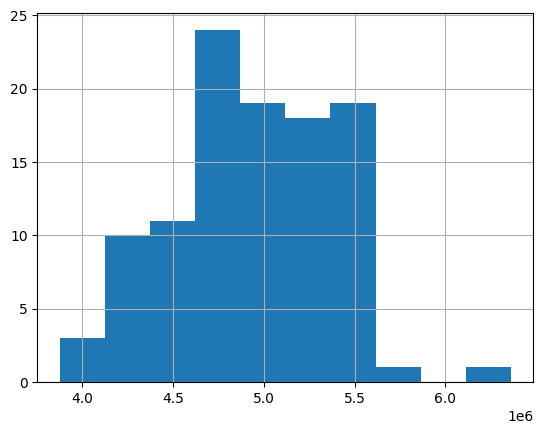

In [ ]:
df_merge_one_area['Estimated_price'].hist()

In [ ]:
card_num

3054129408

In [ ]:
df_merge_one_area.to_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/flat_TSnejina.xlsx')

In [ ]:
## cheaper_market_% - по проданным. Должно иметь распределение

In [ ]:
def analysis_by_sost(s):
  if (s == 'Хорошее') or (s=='Отличное') or (s=='Евроремонт') or (s=='Отделка под ключ') or (s=='Дизайнерский'):
    sost = 'Хорошее'
  elif (s == 'Удовлетворительное') or (s=='Требует ремонта'):
    sost = 'Плохое'
  elif (s == 'Самоотделка') or (s=='Чистовая отделка'):
    sost = 'РемонтОтЗастройщика'
  else:
    sost = 'НетДанных'
  return sost

def analysis_by_subwaydistance(s):
  if s==0:
    dist = 'Растояние не определено'
  elif s>0 and s<250:
    dist = 'Меньше 250 метров'
  elif s>=250 and s<500:
    dist = '250-499 метров'
  elif s>=500 and s<1000:
    dist = '500-999 метров'
  elif s>=1000 and s<2000:
    dist = '1000-1999 метров'
  elif s>=2000 and s<3000:
    dist = '2000-2999 метров'
  elif s>=3000 and s<5000:
    dist = '3000-4999 метров'
  elif s>=5000:
    dist = '5000 и более метров'

  else:
    dist = 'Растояние не определено'
  return dist

def analysis_by_area(s):
  if s<20:
    area = 'Менее 20 кв.м.'
  elif s>= 20 and s < 30:
    area = '20 - 29 кв.м.'
  elif s>= 30 and s < 40:
    area = '30 - 39 кв.м.'
  elif s>= 40 and s < 50:
    area = '40 - 49 кв.м.'
  elif s>= 50 and s < 60:
    area = '50 - 59 кв.м.'
  elif s>= 60 and s < 70:
    area = '60 - 69 кв.м.'
  elif s>= 70 and s < 80:
    area = '70 - 79 кв.м.'
  elif s>= 80 and s < 90:
    area = '80 - 89 кв.м.'
  elif s>= 90 and s < 100:
    area = '90 - 99 кв.м.'
  elif s>= 100:
    area = 'Более 100 кв.м.'
  else:
    area = 'Не определено'
  return area

def analysis_by_floor(etaj,  etajnost):
  if etaj <= 0:
    floor = 'Ниже 1 этаж'
  elif etaj == 1:
    floor = '1-ый этаж'
  elif (etaj == etajnost) and (etajnost>1):
    floor = 'Последний этаж'
  elif etaj >= 2 and etaj < 4:
    floor = '2-4 этаж'
  elif etaj >= 4 and etaj < 6:
    floor = '4-5 этаж'
  elif etaj >= 6 and etaj < 9:
    floor = '6-8 этаж'
  elif etaj >= 9:
    floor = '9 этаж и выше'
  else:
    floor = 'Не определено'
  return floor


def years_since_constructed(s):
  today = datetime.date.today()
  current_year = today.year

  year_since_constructed = current_year - s

  if s > current_year:
    year_group = 'Еще не построена'
  elif s == 0:
    year_group = 'Нет данных'
  elif s == current_year:
    year_group = 'Текущий год'
  elif (year_since_constructed >0) and (year_since_constructed <=3) :
    year_group = '1-3 года'
  elif (year_since_constructed >3) and (year_since_constructed <=6) :
    year_group = '4-6 лет'
  elif (year_since_constructed >6) and (year_since_constructed <=10) :
    year_group = '6-10 лет'
  elif (year_since_constructed >10) and (year_since_constructed <=20) :
    year_group = '10-20 лет'
  elif (year_since_constructed >20) and (year_since_constructed <=30) :
    year_group = '20-30 лет'
  elif (year_since_constructed >30) and (year_since_constructed <=50) :
    year_group = '30-50 лет'
  elif (year_since_constructed >50):
    year_group = 'Более 50 лет'
  else:
    year_group = 'Прочие'
  return year_group


def wall_group(s):
  if (s == "Кирпич") or (s == 'кирпич на ж/б каркасе') or (s == 'Классическая кладка'):
    wall_group = 'Кирпич'
  elif (s == 'Панель') or (s == 'Монолит'):
    wall_group = 'Панель'
  else:
    wall_group = 'Прочие'
  return wall_group

In [ ]:
df_kvartira['etaj_group'] = df_kvartira.apply(lambda x: analysis_by_floor(x['Этаж'], x['Этажность']), axis=1)
df_kvartira['area_group'] = df_kvartira['Space'].apply(analysis_by_area)
df_kvartira['metro_dist_group'] = df_kvartira['Metro distance'].apply(analysis_by_subwaydistance)
df_kvartira['Year_building'] = df_kvartira['Год постройки'].apply(years_since_constructed)
df_kvartira['Sost_group'] = df_kvartira['Sost'].apply(analysis_by_sost)
df_kvartira['Wall_group'] = df_kvartira['Wall'].apply(wall_group)


In [ ]:
def calculate_price_frames(s, k):
  s_mean = s.mean()
  s_std = s.std()
  return s_mean - k*s_std, s_mean + k*s_std

min_price, max_price = calculate_price_frames(df_kvartira['Цена_кв_м'], k=1.5)

df_kvartira = df_kvartira.loc[(df_kvartira['Цена_кв_м']>min_price) & (df_kvartira['Цена_кв_м']<max_price)].reset_index(drop=True)

df_kvartira.head()

,Номер варианта,Папка,Признак,Тип объекта,Родительский_тип,Settlement,District,Street,Obj_number,House_dop,Количество комнат,Space,Metro distance,Этаж,Этажность,Год постройки,Sost,Wall,Участок,Lat,Long,Цена,Цена_кв_м,obj_type
0,10156222,1,Чистая продажа,Типовая,Квартиры/Комнаты,Бердск,Бердск,30 лет победы,41,/3,1,29.0,0,4,9,1976,NaN,Панель,0.0,54.757500,83.066000,785000,27069.0,Квартира
1,30035831,1,Чистая продажа,Улучшенной планировки,Квартиры/Комнаты,Новосибирск,Заельцовский (Новосибирск),Красный проспект,181,NaN,3,85.2,1410,5,17,2011,Хорошее,Кирпич,0.0,55.072500,82.906900,14000000,164319.2,Квартира
2,20152915,1,Чистая продажа,Улучшенной планировки,Квартиры/Комнаты,Бердск,Бердск,Павлова,10,NaN,2,70.0,0,5,5,1999,Евро-ремонт,Кирпич,0.0,54.753400,83.068100,6700000,95714.3,Квартира
3,2048907,1,Чистая продажа,Улучшенной планировки,Квартиры/Комнаты,Пролетарский,Ордынский,Ленина,9,NaN,2,48.0,0,2,2,0,Хорошее,Панель,0.0,54.384881,81.156805,650000,13541.7,Квартира
4,3059604,1,Чистая продажа,Типовая,Квартиры/Комнаты,Огнёва Заимка,Черепановский,Молодёжная,11,NaN,3,65.0,0,1,1,0,Хорошее,Панель,0.0,54.293051,83.742208,1050000,16153.8,Квартира


In [ ]:
# select
# tbl_flats.Cart_Number as 'Номер варианта',
# CONVERT(VARCHAR,tbl_flats.Date_Edit, 120) as 'Дата продажи',
# tbl_flats.Folder_ID as 'Папка',
# tbl_feature.Name as 'Признак',
# tbl_objectstype.Name as 'Тип объекта',
# tbl_objectstype2.Name as 'Родительский_тип',
# tbl_flats.Settlement,
# tbl_flats.District,
# tbl_flats.Street,
# tbl_objects.House as 'Obj_number',
# tbl_objects.House_Dop as 'House_dop',
# tbl_flats.Rooms_Number as 'Количество комнат',
# tbl_flats.Space_Total as 'Space',
# tbl_flats.Metro_m as 'Metro distance',
# tbl_flats.Stor as 'Этаж',
# tbl_flats.Storeys as 'Этажность',
# tbl_objects.Date_Postr as 'Год постройки',
# tbl_flats.Sost,
# tbl_flats.Wall,
# tbl_flats.Space_Sotka as 'Участок',
# tbl_flats.GPS_Lat as 'Lat',
# tbl_flats.GPS_Long as 'Long',
# tbl_flats.Cost as 'Цена'

# from sql.[RFLATS_FLATS].[dbo].[vw_Flats_CRM_View] as tbl_flats

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_CRM] as tbl_objects on tbl_flats.Object_ID = tbl_objects.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype on tbl_objects.Object_Type_Object_ID = tbl_objectstype.ID

# Left join sql.[RFLATS_FLATS].[dbo].[vw_Objects_Type] as tbl_objectstype2 on tbl_objectstype.Parent_ID = tbl_objectstype2.ID

# left join sql.[RFLATS_FLATS].[dbo].[vw_Flats_Feature] as tbl_feature on tbl_flats.Feature_ID = tbl_feature.ID


# where tbl_flats.Folder_ID = 2 and (tbl_flats.Date_Edit between '01.01.2023'  and '31.10.2023') and tbl_flats.Feature_ID in (8)

In [ ]:
## Цепоной индекс
df_sales = pd.read_excel('/content/drive/MyDrive/Jilfond/ML_RealEstatePrice/Sales_jan_oct2023.xlsx')
df_sales.head()

,Номер варианта,Дата продажи,Папка,Признак,Тип объекта,Родительский_тип,Settlement,District,Street,Obj_number,House_dop,Количество комнат,Space,Metro distance,Этаж,Этажность,Год постройки,Sost,Wall,Участок,Lat,Long,Цена
0,2054114890,2023-01-01 02:42:20,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,Новосибирск,Заельцовский (Новосибирск),Кавалерийская,25,NaN,2,78.0,1128,1,17,2018,Евро-ремонт,кирпич на ж/б каркасе,0.00,55.058500,82.929400,8000000
1,8054111752,2023-01-01 02:42:20,2,Продана ЖИЛФОНДОМ,Дом,Земля,Новосибирск,Советский (Новосибирск),Звенигородская,7,NaN,8,820.0,1000,1,1,0,Удовлетворительное,Дерево,8.00,54.852111,83.047393,1500000
2,8054124172,2023-01-01 02:42:20,2,Продана ЖИЛФОНДОМ,Дом,Земля,Обь,Новосибирский,с/о Геофизик,0,NaN,8,150.0,0,1,2,0,NaN,NaN,3.00,54.983311,82.651093,6000000
3,8000100111,2023-01-01 02:42:20,2,Продана ЖИЛФОНДОМ,Дом,Земля,Карасук,Карасукский,Осенняя,37,NaN,8,40.1,0,1,1,2010,Хорошее,Брус,9.79,53.730934,78.068104,1500000
4,2054128545,2023-01-01 02:42:20,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,Новосибирск,Дзержинский (Новосибирск),Толбухина,35,NaN,2,42.8,2217,8,9,1976,NaN,Панель,0.00,55.040500,83.010900,4050000


In [ ]:
df_sales['Month'] = df_sales['Дата продажи'].dt.month
df_sales['Year'] = df_sales['Дата продажи'].dt.year

In [ ]:
df_sales['Цена_кв_м'] = (df_sales['Цена'] / df['Space']).round(1)
df_sales = df_sales[df_sales['Цена_кв_м'].notna()]


In [ ]:
df_sales['Тип объекта'] = df_sales['Тип объекта'].astype(str)

df_sales['obj_type'] = df_sales['Тип объекта'].apply(obj_type)
df_kvartira_sold = df_sales.loc[(df_sales['obj_type'] == 'Квартира') & (df_sales['Settlement'] == 'Новосибирск')].reset_index(drop=True)

min_price, max_price = calculate_price_frames(df_kvartira_sold['Цена_кв_м'], k=1.5)
df_kvartira_sold.head()

,Номер варианта,Дата продажи,Папка,Признак,Тип объекта,Родительский_тип,Settlement,District,Street,Obj_number,House_dop,Количество комнат,Space,Metro distance,Этаж,Этажность,Год постройки,Sost,Wall,Участок,Lat,Long,Цена,Month,Year,Цена_кв_м,obj_type
0,2054114890,2023-01-01 02:42:20,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,Новосибирск,Заельцовский (Новосибирск),Кавалерийская,25,NaN,2,78.0,1128,1,17,2018,Евро-ремонт,кирпич на ж/б каркасе,0.0,55.0585,82.9294,8000000,1,2023,25039.1,Квартира
1,1054151016,2023-01-01 02:42:21,2,Продана ЖИЛФОНДОМ,Типовая,Квартиры/Комнаты,Новосибирск,Заельцовский (Новосибирск),Холодильная,18,/1,1,29.8,1907,8,9,1980,NaN,Панель,0.0,55.0519,82.8848,4150000,1,2023,23055.6,Квартира
2,1054137732,2023-01-02 02:40:42,2,Продана ЖИЛФОНДОМ,Хрущевка,Квартиры/Комнаты,Новосибирск,Центральный (Новосибирск),Ипподромская,27,NaN,1,30.0,488,1,5,1970,NaN,Панель,0.0,55.0417,82.9409,3750000,1,2023,8370.5,Квартира
3,3054115253,2023-01-02 12:58:26,2,Продана ЖИЛФОНДОМ,Полногабаритная,Квартиры/Комнаты,Новосибирск,Центральный (Новосибирск),Крылова,3,NaN,3,77.3,225,4,5,1937,NaN,Кирпич,0.0,55.0405,82.9153,9500000,1,2023,18269.2,Квартира
4,2054115546,2023-01-04 13:39:46,2,Продана ЖИЛФОНДОМ,Хрущевка,Квартиры/Комнаты,Новосибирск,Первомайский (Новосибирск),Берёзовая,5,/2,2,42.8,13869,4,5,1987,Хорошее,Панель,0.0,54.9377,83.1166,3300000,1,2023,85492.2,Квартира


In [ ]:
df_kvartira_sold = df_kvartira_sold.loc[(df_kvartira_sold['Цена_кв_м']>min_price) & (df_kvartira_sold['Цена_кв_м']<max_price)].reset_index(drop=True)
df_kvartira_sold = df_kvartira_sold[~df_kvartira_sold['Номер варианта'].astype(str).str.contains('^[9,7]')==True]

df_kvartira_sold['Settlement'] = df_kvartira_sold['Settlement'].fillna('').astype(str)
df_kvartira_sold['Street'] = df_kvartira_sold['Street'].fillna('').astype(str)
df_kvartira_sold['Obj_number'] = df_kvartira_sold['Obj_number'].fillna('').astype(str)
df_kvartira_sold['House_dop'] = df_kvartira_sold['House_dop'].fillna('').astype(str)



In [ ]:
df_kvartira_sold['etaj_group'] = df_kvartira_sold.apply(lambda x: analysis_by_floor(x['Этаж'], x['Этажность']), axis=1)
df_kvartira_sold['area_group'] = df_kvartira_sold['Space'].apply(analysis_by_area)
df_kvartira_sold['metro_dist_group'] = df_kvartira_sold['Metro distance'].apply(analysis_by_subwaydistance)
df_kvartira_sold['Year_building'] = df_kvartira_sold['Год постройки'].apply(years_since_constructed)
df_kvartira_sold['Sost_group'] = df_kvartira_sold['Sost'].apply(analysis_by_sost)
df_kvartira_sold['Wall_group'] = df_kvartira_sold['Wall'].apply(wall_group)
df_kvartira_sold['Adress'] = 'г. ' + df_kvartira_sold['Settlement'] + '. ул. ' + df_kvartira_sold['Street'] + ' ' + df_kvartira_sold['Obj_number']+ df_kvartira_sold['House_dop']
df_kvartira_sold.head()

,Номер варианта,Дата продажи,Папка,Признак,Тип объекта,Родительский_тип,Settlement,District,Street,Obj_number,House_dop,Количество комнат,Space,Metro distance,Этаж,Этажность,Год постройки,Sost,Wall,Участок,Lat,Long,Цена,Month,Year,Цена_кв_м,obj_type,etaj_group,area_group,metro_dist_group,Year_building,Sost_group,Wall_group,Adress
0,2054114890,2023-01-01 02:42:20,2,Продана ЖИЛФОНДОМ,Улучшенной планировки,Квартиры/Комнаты,Новосибирск,Заельцовский (Новосибирск),Кавалерийская,25,,2,78.0,1128,1,17,2018,Евро-ремонт,кирпич на ж/б каркасе,0.0,55.0585,82.9294,8000000,1,2023,25039.1,Квартира,1-ый этаж,70 - 79 кв.м.,1000-1999 метров,4-6 лет,НетДанных,Кирпич,г. Новосибирск. ул. Кавалерийская 25
1,1054151016,2023-01-01 02:42:21,2,Продана ЖИЛФОНДОМ,Типовая,Квартиры/Комнаты,Новосибирск,Заельцовский (Новосибирск),Холодильная,18,/1,1,29.8,1907,8,9,1980,NaN,Панель,0.0,55.0519,82.8848,4150000,1,2023,23055.6,Квартира,6-8 этаж,20 - 29 кв.м.,1000-1999 метров,30-50 лет,НетДанных,Панель,г. Новосибирск. ул. Холодильная 18/1
2,1054137732,2023-01-02 02:40:42,2,Продана ЖИЛФОНДОМ,Хрущевка,Квартиры/Комнаты,Новосибирск,Центральный (Новосибирск),Ипподромская,27,,1,30.0,488,1,5,1970,NaN,Панель,0.0,55.0417,82.9409,3750000,1,2023,8370.5,Квартира,1-ый этаж,30 - 39 кв.м.,250-499 метров,Более 50 лет,НетДанных,Панель,г. Новосибирск. ул. Ипподромская 27
3,3054115253,2023-01-02 12:58:26,2,Продана ЖИЛФОНДОМ,Полногабаритная,Квартиры/Комнаты,Новосибирск,Центральный (Новосибирск),Крылова,3,,3,77.3,225,4,5,1937,NaN,Кирпич,0.0,55.0405,82.9153,9500000,1,2023,18269.2,Квартира,4-5 этаж,70 - 79 кв.м.,Меньше 250 метров,Более 50 лет,НетДанных,Кирпич,г. Новосибирск. ул. Крылова 3
4,2054115546,2023-01-04 13:39:46,2,Продана ЖИЛФОНДОМ,Хрущевка,Квартиры/Комнаты,Новосибирск,Первомайский (Новосибирск),Берёзовая,5,/2,2,42.8,13869,4,5,1987,Хорошее,Панель,0.0,54.9377,83.1166,3300000,1,2023,85492.2,Квартира,4-5 этаж,40 - 49 кв.м.,5000 и более метров,30-50 лет,Хорошее,Панель,г. Новосибирск. ул. Берёзовая 5/2


In [ ]:
df_kvartira_sold['Settlement'].value_counts()

Новосибирск    3764
Name: Settlement, dtype: int64

In [ ]:
df_kvartira_sold['obj_type'].value_counts()

Квартира    3764
Name: obj_type, dtype: int64

In [ ]:
df_kvartira_sold['Цена_кв_м'].isna().sum()

0

In [ ]:
Number_sold = df_kvartira_sold.pivot_table(values='Номер варианта', index=['Year','Month'], aggfunc=lambda x: len(x.unique())).reset_index()
Number_sold.rename(columns={'Номер варианта':'Количество проданных'}, inplace=True)
Number_sold

,Year,Month,Количество проданных
0,2023,1,102
1,2023,2,174
2,2023,3,302
3,2023,4,438
4,2023,5,290
5,2023,6,478
6,2023,7,386
7,2023,8,545
8,2023,9,676
9,2023,10,373


In [ ]:
Month_index = df_kvartira_sold.pivot_table(values='Цена_кв_м', index=['Year','Month'], aggfunc='mean').reset_index()
Month_index['Цена_prev'] = Month_index['Цена_кв_м'].shift().fillna(Month_index['Цена_кв_м'])
Month_index['index_prev'] = Month_index['Цена_prev'] / Month_index['Цена_кв_м']
Month_index['index_prev_cum'] = Month_index['index_prev'].cumprod()
Month_index = Month_index.merge(Number_sold, how='inner', left_on=['Year','Month'], right_on=['Year','Month'],)
Month_index

,Year,Month,Цена_кв_м,Цена_prev,index_prev,index_prev_cum,Количество проданных
0,2023,1,90793.998039,90793.998039,1.000000,1.000000,102
1,2023,2,91338.594828,90793.998039,0.994038,0.994038,174
2,2023,3,93344.713245,91338.594828,0.978508,0.972674,302
3,2023,4,104781.285845,93344.713245,0.890853,0.866510,438
4,2023,5,85571.964828,104781.285845,1.224481,1.061025,290
5,2023,6,94674.092469,85571.964828,0.903858,0.959016,478
6,2023,7,102196.971762,94674.092469,0.926388,0.888422,386
7,2023,8,109547.561284,102196.971762,0.932900,0.828809,545
8,2023,9,115134.622189,109547.561284,0.951474,0.788590,676
9,2023,10,109913.254692,115134.622189,1.047504,0.826051,373


In [ ]:
df_storey_corrected['Nearest_metro'].value_counts()

Золотая Нива    15
Name: Nearest_metro, dtype: int64

In [ ]:
df_infr['Infrustructure_type'].value_counts()

Продукты                 3340
Детский сад               625
Школа                     452
Спорт                     336
Другой детский сад         74
Колледж                    39
Лицей                      30
Гимназия                   22
Метро                      13
Образовательный центр       5
Техникум                    4
Другое образование          3
Name: Infrustructure_type, dtype: int64

In [ ]:
df_kvartira.columns

Index(['Номер варианта', 'Папка', 'Признак', 'Тип объекта', 'Родительский_тип',
       'Settlement', 'District', 'Street', 'Obj_number', 'House_dop',
       'Количество комнат', 'Space', 'Metro distance', 'Этаж', 'Этажность',
       'Год постройки', 'Sost', 'Wall', 'Участок', 'Lat', 'Long', 'Цена',
       'Цена_кв_м', 'obj_type', 'etaj_group', 'area_group', 'metro_dist_group',
       'Year_building', 'Sost_group', 'Wall_group', 'Adress', 'geometry',
       'Coords'],
      dtype='object')

In [ ]:
df_kv_short = df_kvartira[['Номер варианта', 'Adress',  'Lat', 'Long', 'etaj_group', 'area_group', 'metro_dist_group',
       'Year_building', 'Sost_group', 'Wall_group', 'Цена_кв_м']]
df_kv_short.head()

,Номер варианта,Adress,Lat,Long,etaj_group,area_group,metro_dist_group,Year_building,Sost_group,Wall_group,Цена_кв_м
0,30035831,г. Новосибирск. ул. Красный проспект 181,55.0725,82.9069,4-5 этаж,80 - 89 кв.м.,1000-1999 метров,10-20 лет,Хорошее,Кирпич,164319.2
2,20077321,г. Новосибирск. ул. Лескова 29,55.0237,82.9535,6-8 этаж,60 - 69 кв.м.,1000-1999 метров,6-10 лет,Хорошее,Кирпич,144508.7
3,30013667,г. Новосибирск. ул. Фрунзе 65,55.0412,82.9537,6-8 этаж,50 - 59 кв.м.,Меньше 250 метров,30-50 лет,Хорошее,Панель,155172.4
4,4003566,г. Новосибирск. ул. Дмитрия Донского 26/1,55.0641,82.8963,2-4 этаж,Более 100 кв.м.,1000-1999 метров,10-20 лет,НетДанных,Кирпич,96575.9
6,200716205,г. Новосибирск. ул. Татьяны Снежиной 29,55.0208,83.0111,Последний этаж,50 - 59 кв.м.,3000-4999 метров,10-20 лет,Хорошее,Панель,87108.0


In [ ]:
df_kv_short['metro_dist_group'].value_counts()

5000 и более метров        2056
3000-4999 метров           1142
1000-1999 метров           1068
500-999 метров              949
2000-2999 метров            635
250-499 метров              455
Меньше 250 метров           157
Растояние не определено      26
Name: metro_dist_group, dtype: int64

In [ ]:
df_kv_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6488 entries, 0 to 6856
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Номер варианта    6488 non-null   int64  
 1   Adress            6488 non-null   object 
 2   Lat               6488 non-null   float64
 3   Long              6488 non-null   float64
 4   etaj_group        6488 non-null   object 
 5   area_group        6488 non-null   object 
 6   metro_dist_group  6488 non-null   object 
 7   Year_building     6488 non-null   object 
 8   Sost_group        6488 non-null   object 
 9   Wall_group        6488 non-null   object 
 10  Цена_кв_м         6488 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 608.2+ KB


In [ ]:
df_kv_short.dtypes[df_kv_short.dtypes=='object']

Adress              object
etaj_group          object
area_group          object
metro_dist_group    object
Year_building       object
Sost_group          object
Wall_group          object
dtype: object

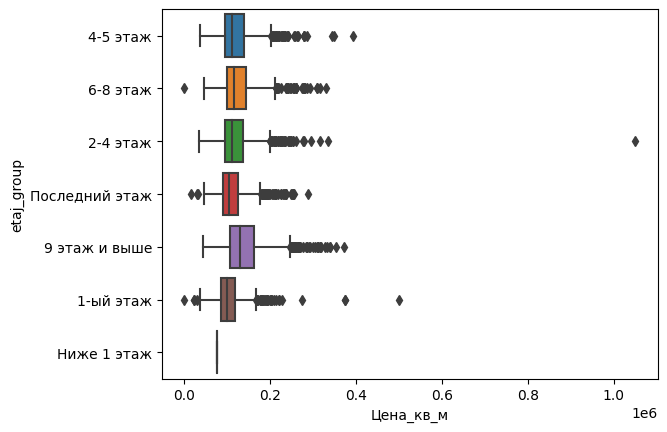

In [ ]:
sns.boxplot(data=df_kv_short, x = 'Цена_кв_м', y = 'etaj_group');

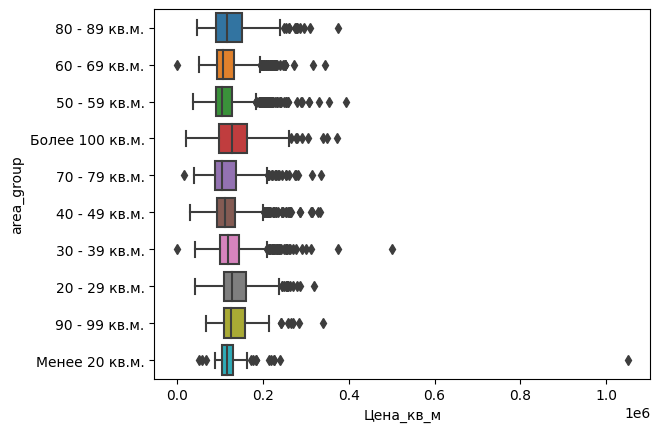

In [ ]:
sns.boxplot(data=df_kv_short, x = 'Цена_кв_м', y = 'area_group');

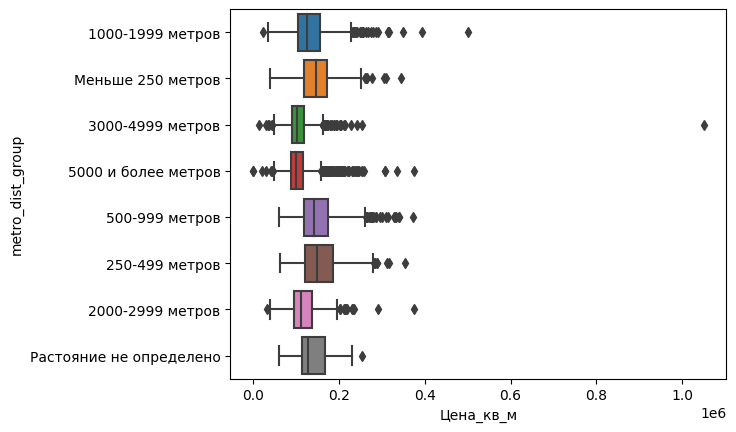

In [ ]:
sns.boxplot(data=df_kv_short, x = 'Цена_кв_м', y = 'metro_dist_group');

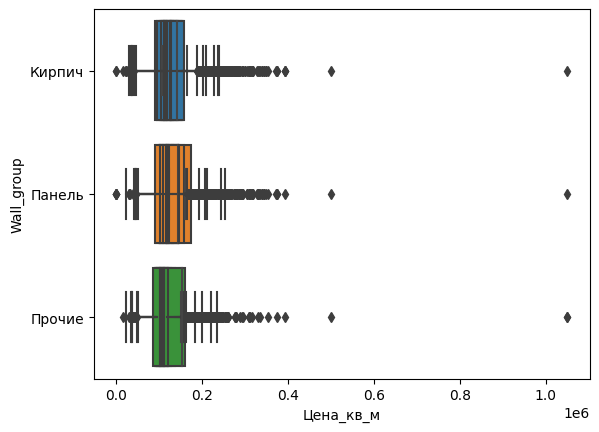

In [ ]:
for feat in df_kv_short.dtypes[df_kv_short.dtypes=='object'].index:
  sns.boxplot(data=df_kv_short, x = 'Цена_кв_м', y = '{}'.format(feat))

<ipython-input-37-5ca243b1a92c>:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df_kvartira.corr(), dtype=np.bool)
<ipython-input-37-5ca243b1a92c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_kvartira.corr(), dtype=np.bool)
<ipython-input-37-5ca243b1a92c>:4: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_

<Axes: >

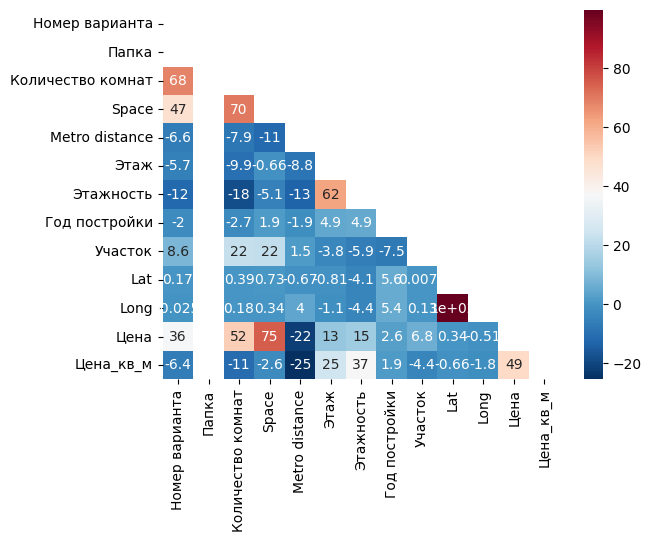

In [ ]:
mask = np.zeros_like(df_kvartira.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# heatmap
sns.heatmap(df_kvartira.corr()*100,
           cmap='RdBu_r',
           annot = True,
           mask = mask)